# PROJECT: Student Alcohol Consumption

# INTRODUCTION


Greetings everyone. 
We are Manos and Takis, and we are currently enrolled in the data science master's program at ELU. We are pleased to present our findings on the "students alcohol consumption" dataset, which we have been analyzing for the past two weeks. This dataset comprises a diverse range of features that can be utilized to predict a student's final exam scores. During our analysis, we discovered intriguing correlations between alcohol consumption and student behavior. Our project is designed to answer a series of questions by following these steps:

Step 1: Data cleaning to create the final dataset

Step 2: Exploratory data analysis to understand the dataset

Step 3: Investigation of the distributions of features to gain a deeper understanding of the dataset

Step 4: Does alcohol consumption impact students grades?

Step 4.1: Do students from separated parents consume more alcohol?

Step 4.2: Are there any other correlations between students and alcohol?

Step 5: We trained a Model with the first two grades to predict the third grade ,using a linera kernel with a C value of 1 and an epsilon value of 0.1.

Thank you for your attention.

# Dataset Features Description

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets

-school : student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

-sex : student's sex (binary: 'F' - female or 'M' - male)

-age : student's age (numeric: from 15 to 22)

-address : student's home address type (binary: 'U' - urban or 'R' - rural)

-famsize : family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

-Pstatus : parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

-Medu : mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

-Fedu : father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

-Mjob : mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

-Fjob : father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

-reason : reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

-guardian : student's guardian (nominal: 'mother', 'father' or 'other')

-traveltime : home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

-studytime : weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

-failures : number of past class failures (numeric: n if 1<=n<3, else 4)

-schoolsup : extra educational support (binary: yes or no)

-famsup : family educational support (binary: yes or no)

-paid : extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

-activities : extra-curricular activities (binary: yes or no)

-nursery : attended nursery school (binary: yes or no)

-higher : wants to take higher education (binary: yes or no)

-internet : Internet access at home (binary: yes or no)

-romantic : with a romantic relationship (binary: yes or no)

-famrel : quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

-freetime : free time after school (numeric: from 1 - very low to 5 - very high)

-goout : going out with friends (numeric: from 1 - very low to 5 - very high)

-Dalc : workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

-Walc : weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

-health : current health status (numeric: from 1 - very bad to 5 - very good)

-absences : number of school absences (numeric: from 0 to 93)

-G1 : first period grade (numeric: from 0 to 20)

-G2 : second period grade (numeric: from 0 to 20)

-G3 : final grade (numeric: from 0 to 20, output target)

#  STEP 1: DATA CLEANING

The objective of this step is to clean and merge the datasets.

In [1]:
#Import all the necessery libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
import matplotlib.gridspec as gs
from scipy import stats
from sklearn.preprocessing import LabelEncoder  
import warnings
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#load the student-mat.csv dataset
import pandas as pd
df1=pd.read_csv(r'C:\Users\User\Desktop\ELU\Projects\module4\student-mat.csv', sep=';')
print(df1.info)

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [3]:
#load the student-por.csv dataset
df2=pd.read_csv(r'C:\Users\User\Desktop\ELU\Projects\module4\student-por.csv',sep=';')
print(df2.info)

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel fre

In [4]:
#merge the two datasets
df = pd.concat([df1, df2], ignore_index=True)
print(df.info)

<bound method DataFrame.info of      school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0        GP   F   18       U     GT3       A     4     4   at_home   teacher   
1        GP   F   17       U     GT3       T     1     1   at_home     other   
2        GP   F   15       U     LE3       T     1     1   at_home     other   
3        GP   F   15       U     GT3       T     4     2    health  services   
4        GP   F   16       U     GT3       T     3     3     other     other   
...     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
1039     MS   F   19       R     GT3       T     2     3  services     other   
1040     MS   F   18       U     LE3       T     3     1   teacher  services   
1041     MS   F   18       U     GT3       T     1     1     other     other   
1042     MS   M   17       U     LE3       T     3     1  services  services   
1043     MS   M   18       R     LE3       T     3     2  services     other   

      .

In [5]:
# Check for null values in the dataframe
null_values = df.isnull().sum()

#Print the number of null values in each column
print('sum of null values:')
print(null_values)

sum of null values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [6]:
print('Number of duplicates:',df.duplicated().sum())

Number of duplicates: 0


************************

# STEP 2: EXPLORATORY DATA ANALYSIS 

In this step, we will be reviewing some general information regarding the students and their parents, in order to gain a deeper understanding of the dataset.

STUDENTS

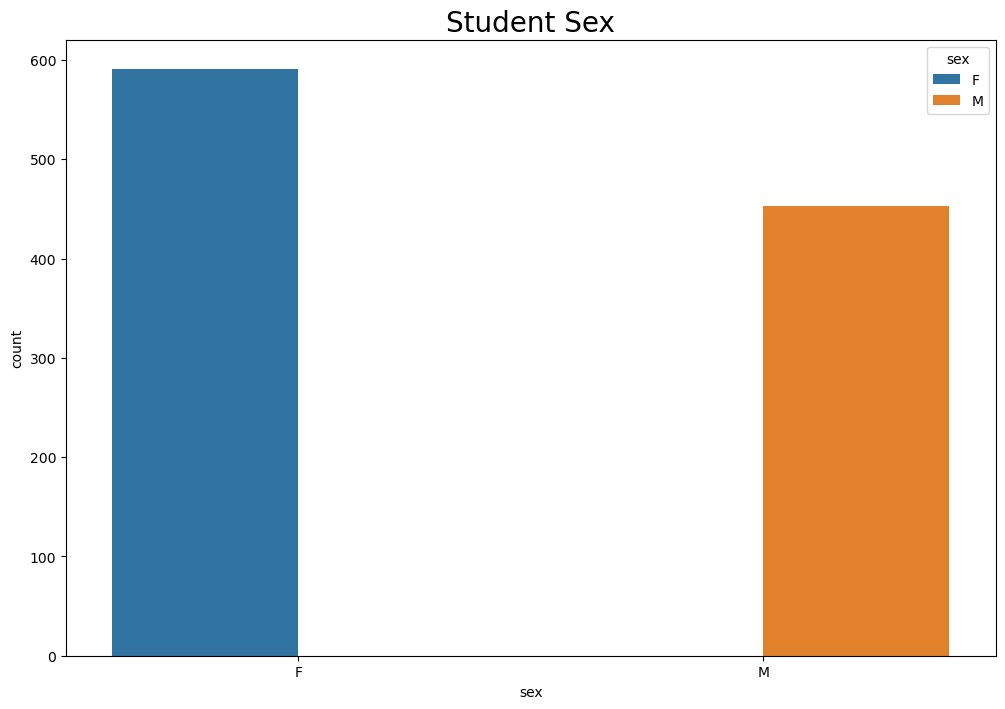

In [7]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="sex", hue="sex")
plt.title("Student Sex",size=20)
plt.savefig('myplot.jpg', format='jpeg')
plt.show()

- We can notice that there are slightly more woman that man in that survey

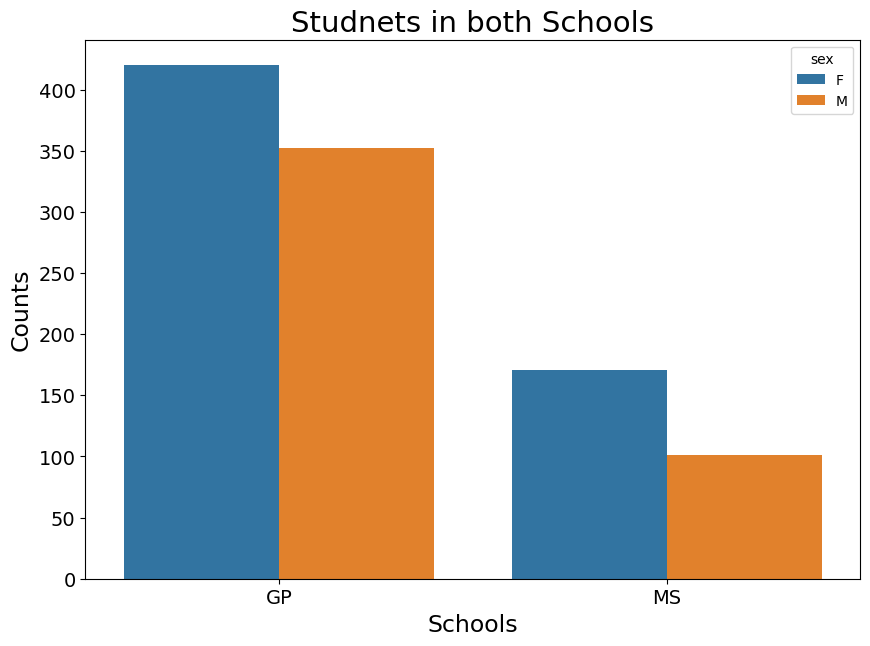

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(x="school", data=df,hue="sex")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Schools",fontsize=17)
plt.ylabel("Counts",fontsize=17)
plt.title("Studnets in both Schools",fontsize=21)
plt.show()

- We notice that the school GP has  more students in comparison the MS.

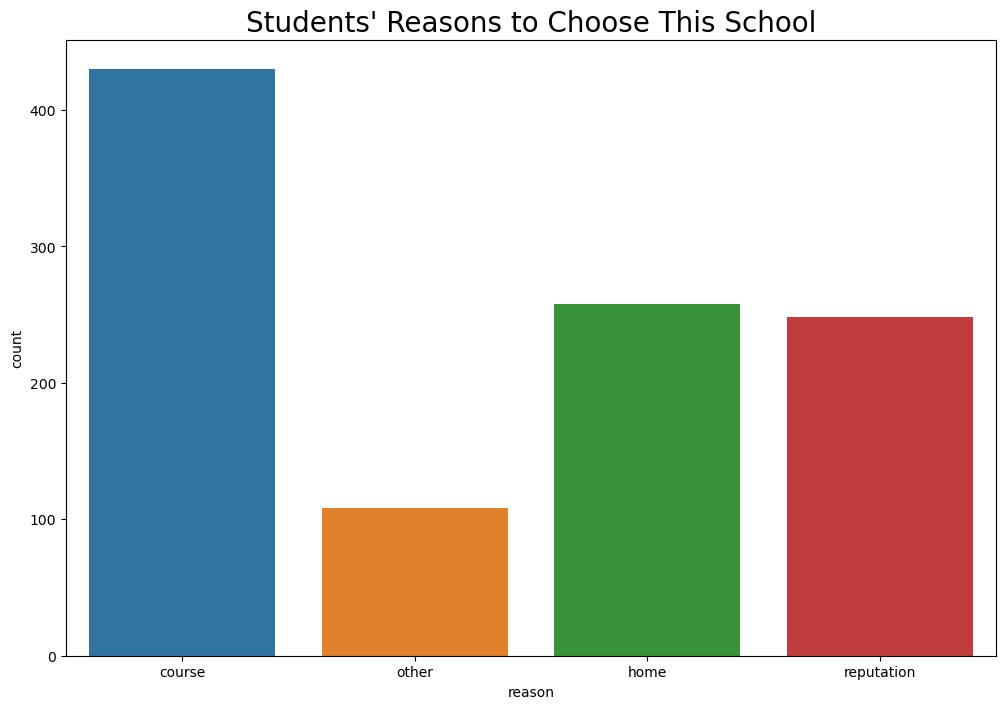

In [9]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df["reason"])
plt.title("Students' Reasons to Choose This School",size=20)
plt.show()

- We notice that the main reason for our students to choose this school is the course

<Axes: title={'center': 'Ages of Study (students)'}>

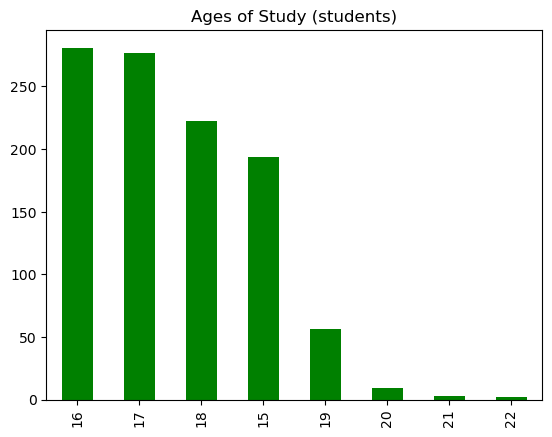

In [20]:
df['age'].value_counts(sort = True).plot(kind = 'bar', color = 'green', title = 'Ages of Study (students)')

- From the age distribution of our students we notice that the most of them are betwwen 16-19 years old

<Axes: title={'center': 'Students Studytime (Rated 1-4)'}>

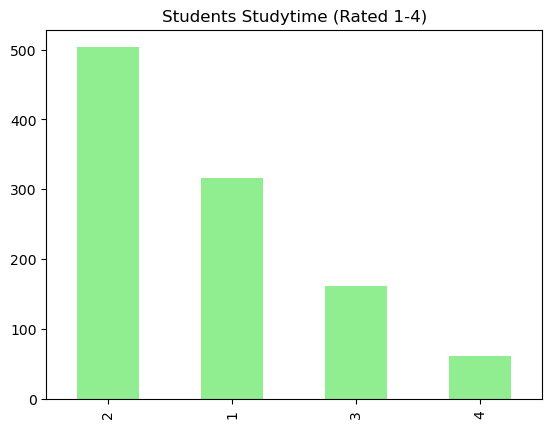

In [19]:
df['studytime'].value_counts().plot(kind = 'bar', title = 'Students Studytime (Rated 1-4)', color = 'lightgreen')

- From the students studytime we notice that the main studytime is 2 to 5 hours.

PARENTS

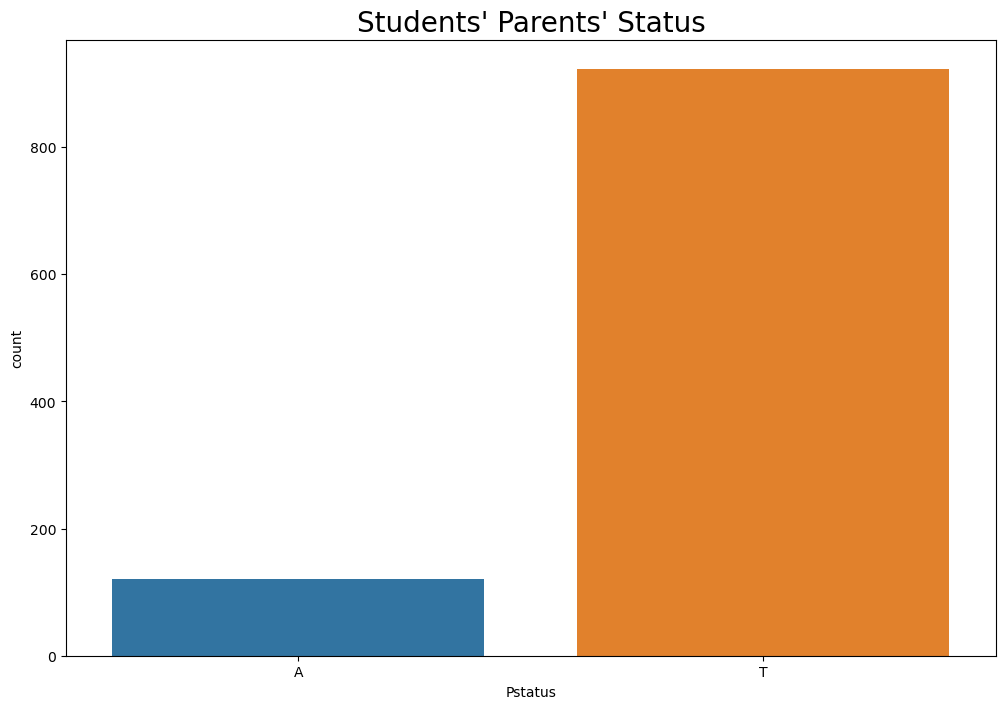

In [29]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df["Pstatus"])
plt.title("Students' Parents' Status",size=20)
plt.show()

- The students parents status is 'T' - living together or 'A' - apart. We notice that the main status is that the parents are living together.

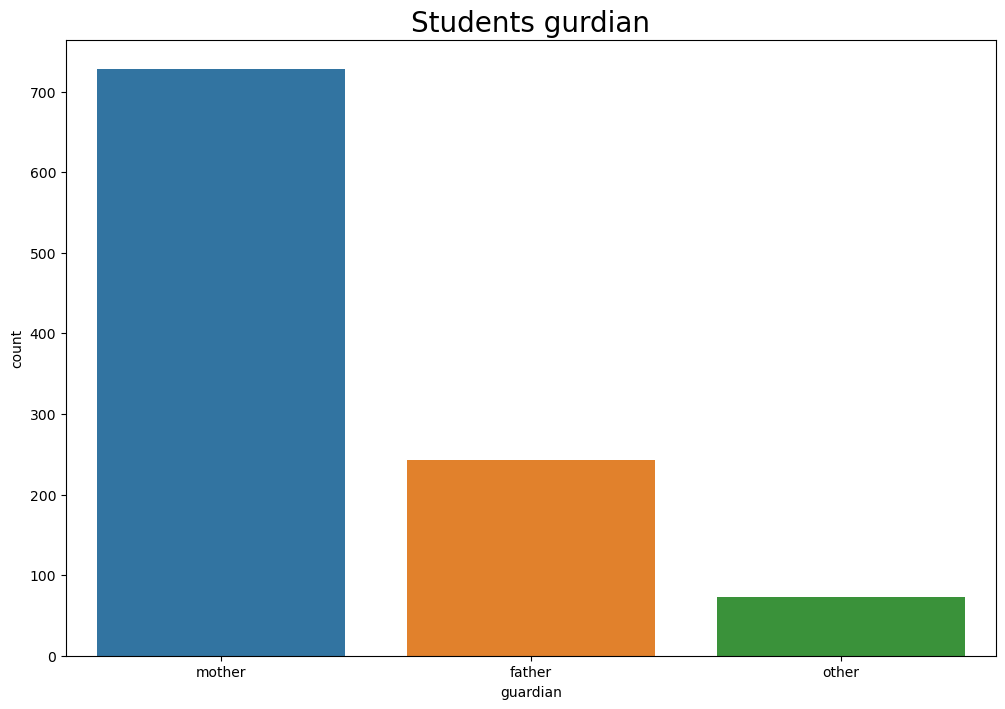

In [28]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df["guardian"])
plt.title("Students gurdian", size=20)
plt.show()

- We notice that in most of the cases the gurdian of the students is the mother.

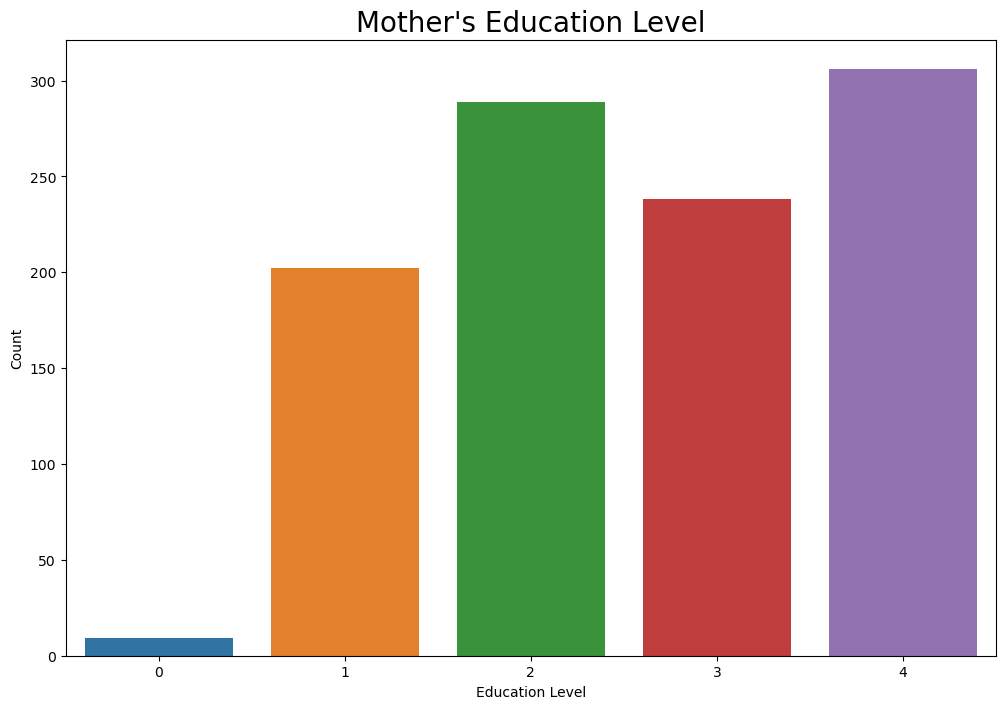

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot( x=df['Medu'])
plt.title("Mother's Education Level", size=20)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

- We notice that the mothers educational level is above primary education with biggest ammount in higher education

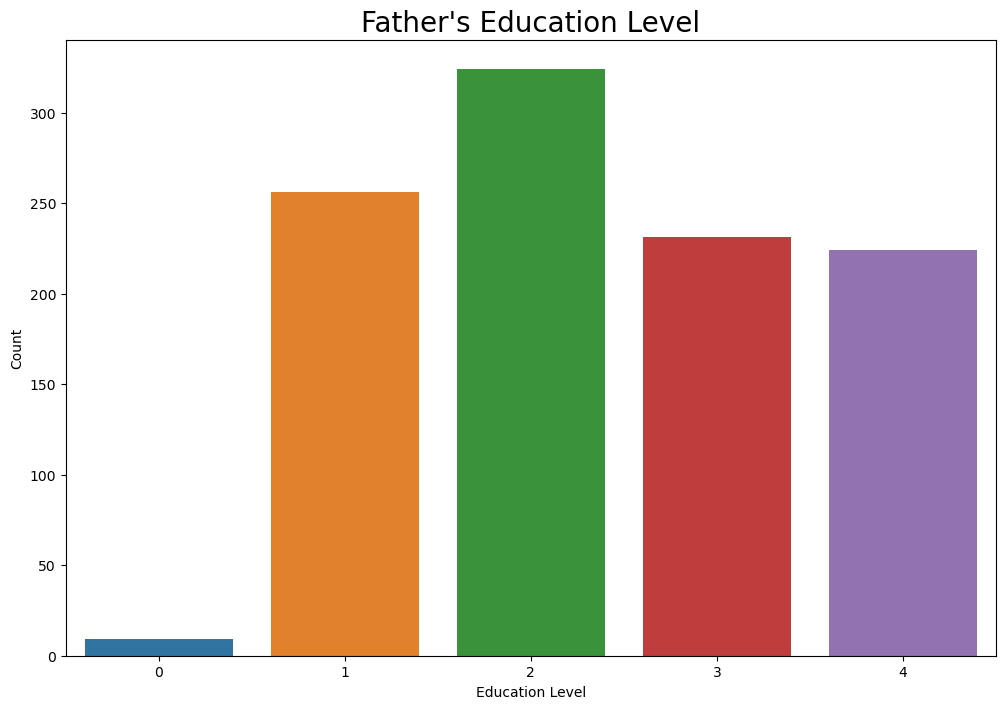

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df["Fedu"])
plt.title("Father's Education Level", size=20)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

- We notice that the fathers educational level is above primary education with bigger ammount in 5th-9th grade.

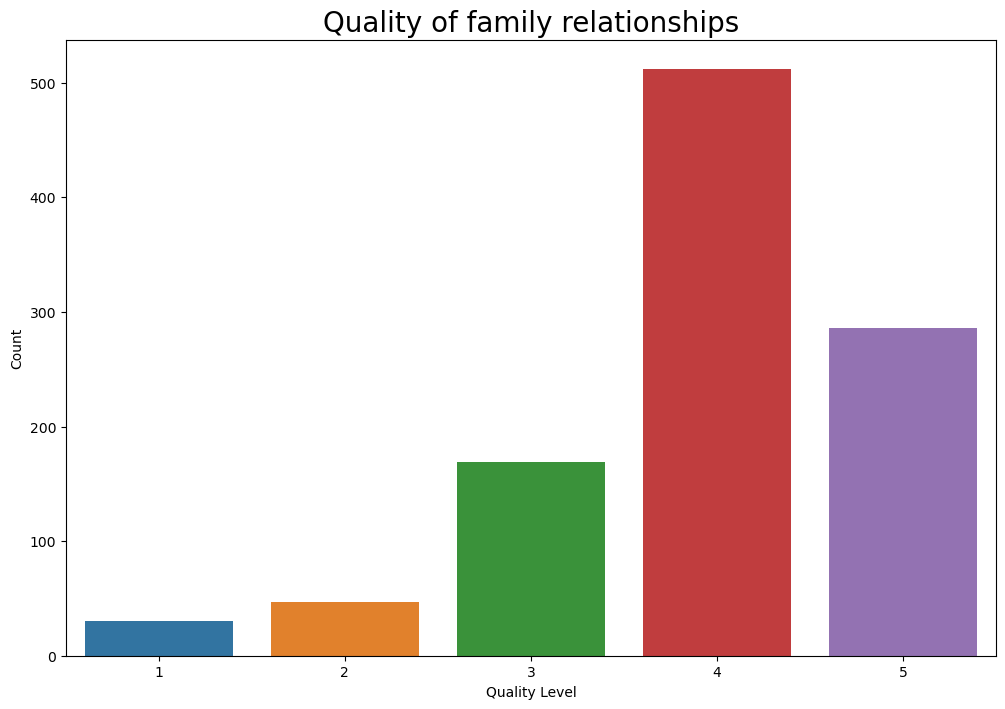

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df["famrel"])
plt.title("Quality of family relationships", size=20)
plt.xlabel("Quality Level")
plt.ylabel("Count")
plt.show()

- We have observed that a majority of the parents maintain a positive relationship with their children. 
The dataset indicates that the majority of variables fall within the '4' range, which is one level below 'excellent'.

***********************

# STEP 3: INVESTIGATE DISTRIBUTIONS OF FEATURES

Now that we have obtained the preliminary information from the exploratory data analysis, our next step is to visualize the distribution of continuous, ordinal, and nominal variables. This will provide us with a more comprehensive understanding of our dataset

# Distribution of continuous variables

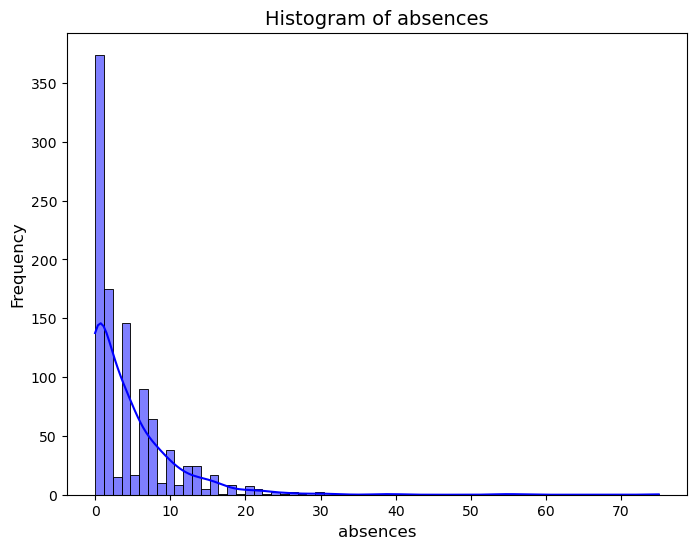

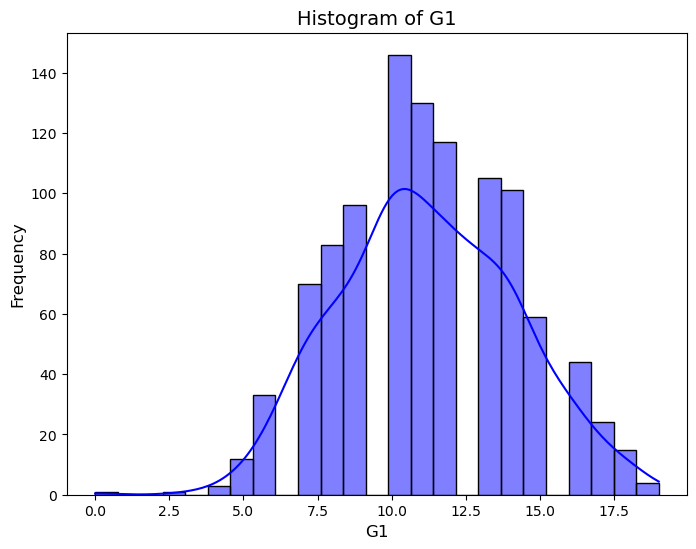

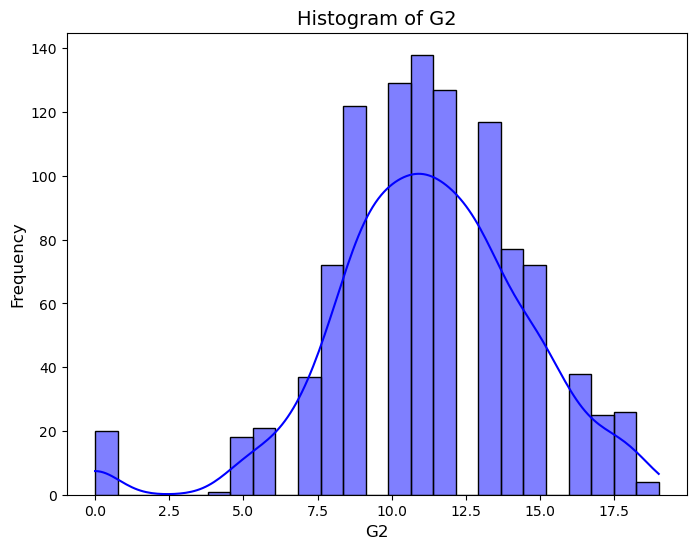

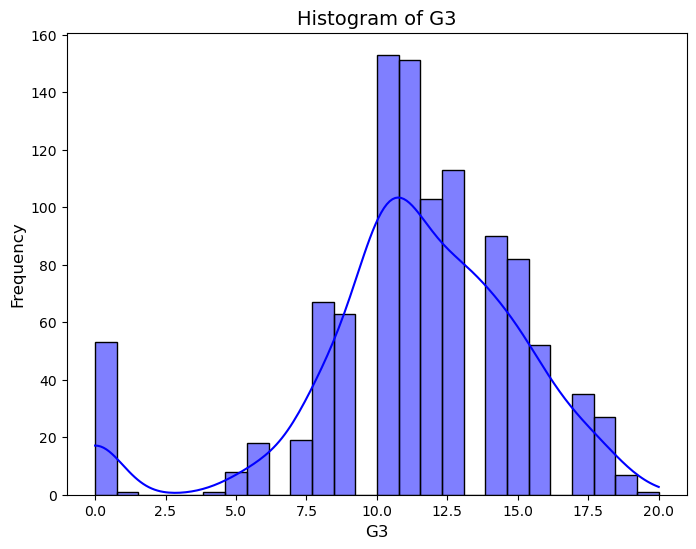

In [34]:
cont = ["absences", "G1", "G2", "G3"]
for c in cont:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[c], kde=True, color="b")
    plt.xlabel(c, size=12)
    plt.ylabel("Frequency", size=12)
    plt.title(f"Histogram of {c}", size=14)
    plt.show()

- A large majority of students have never had any absences. However, we find exceptions after 10 absences, with a minority reaching as many as 32 absences

- Grades have a normal distribution, although in G2 and G3 we notice a small group of students who took 0

# Distribution of ordinal variables

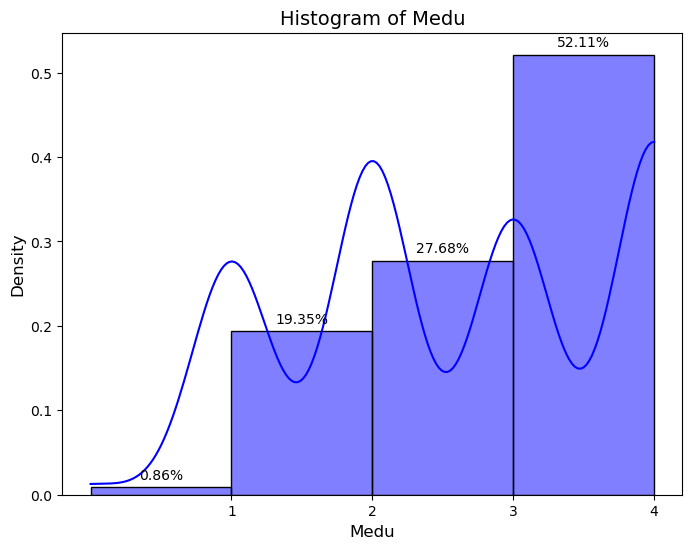

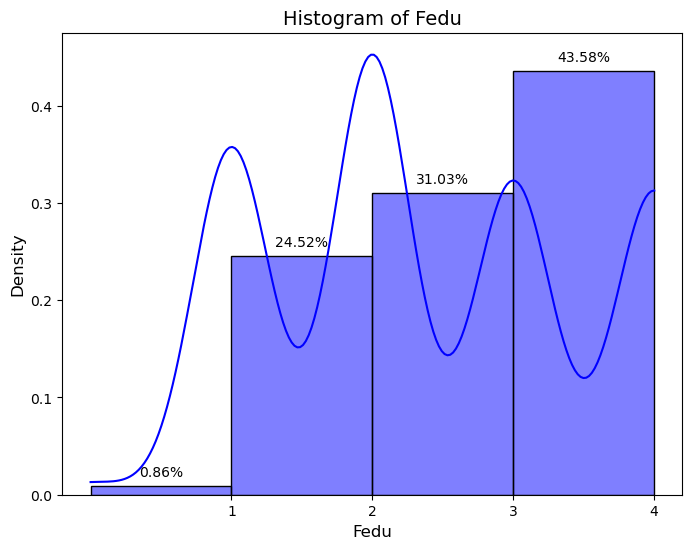

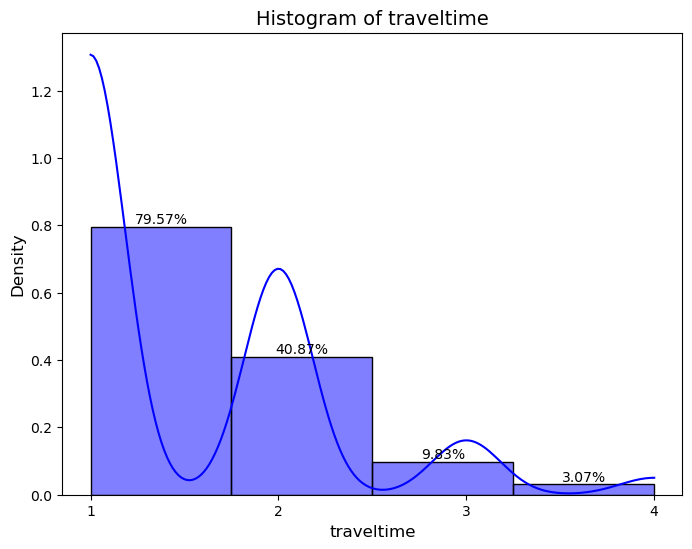

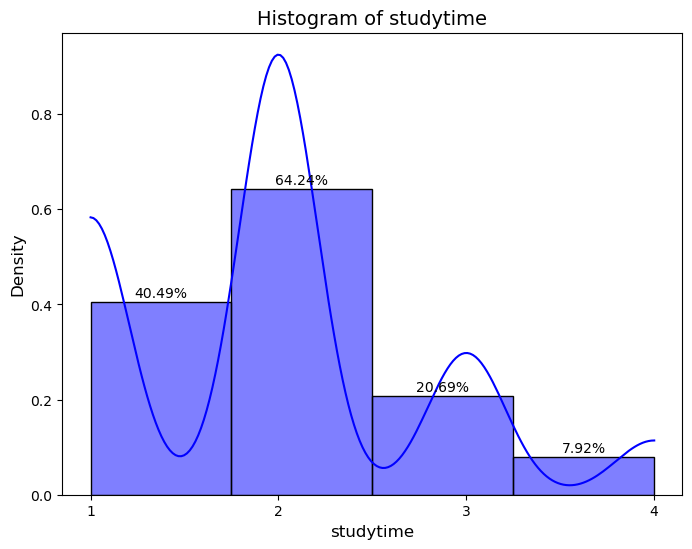

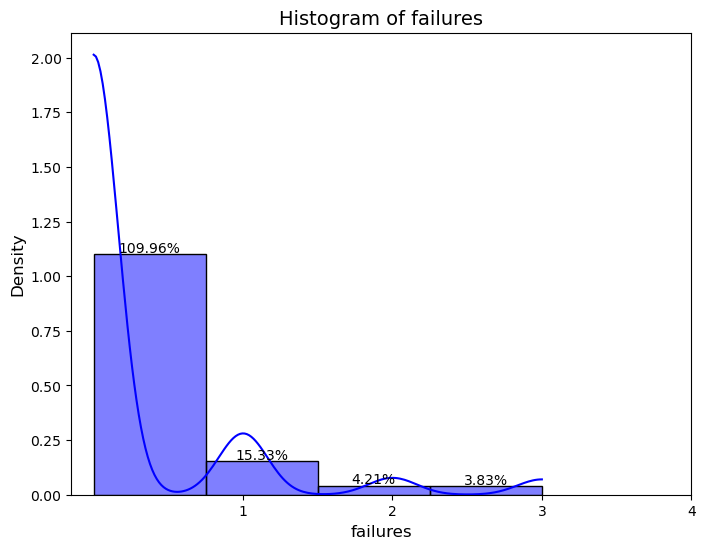

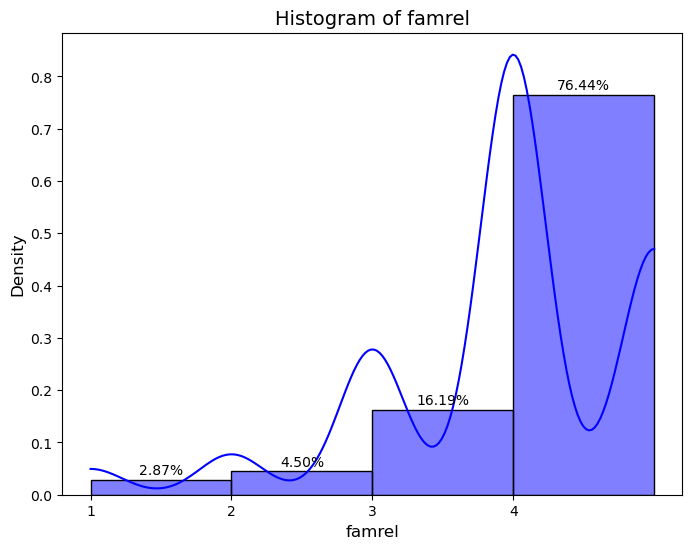

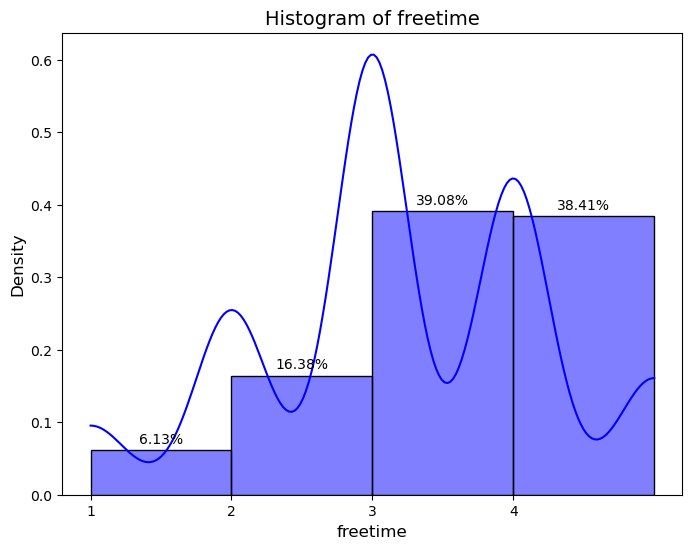

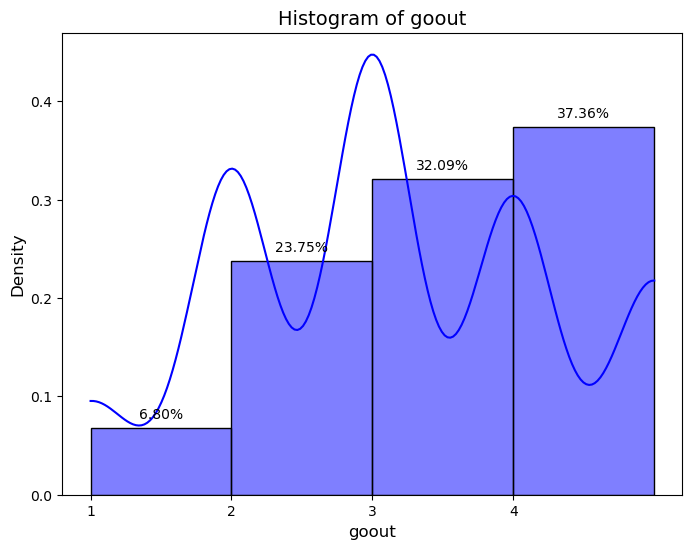

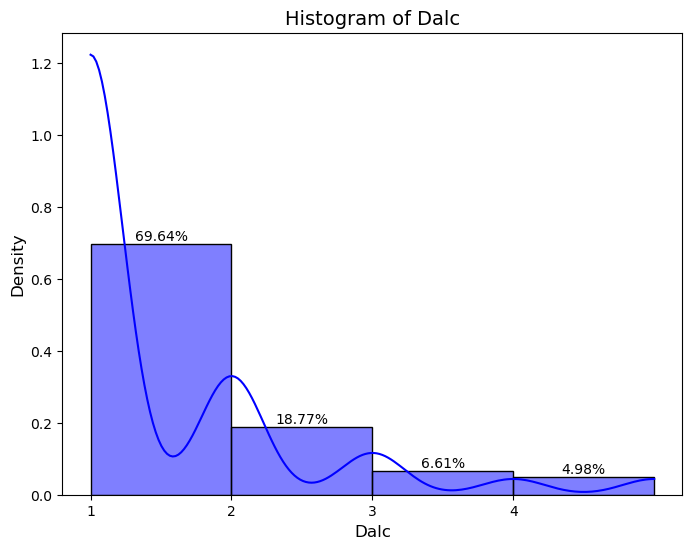

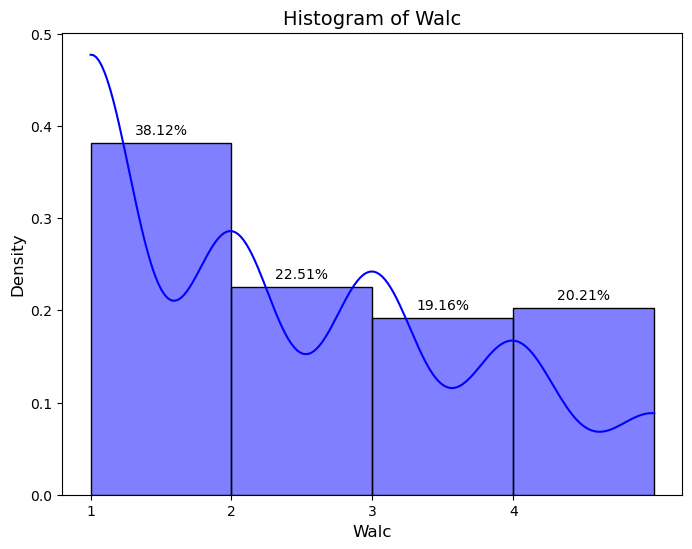

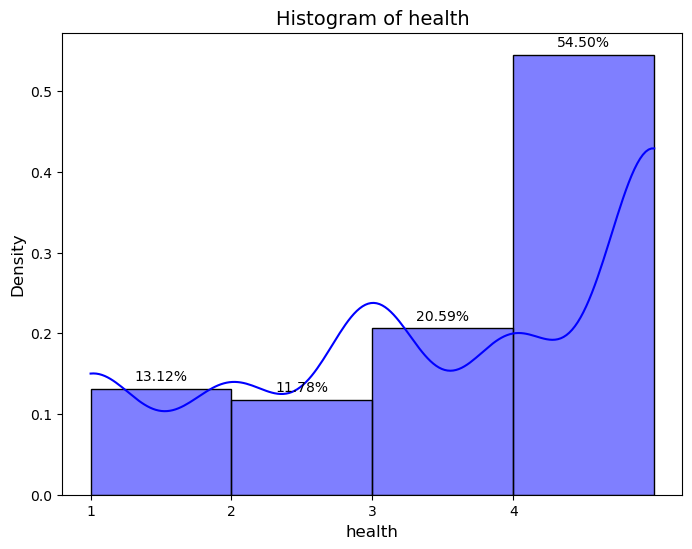

In [35]:
ordin = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health"]
for c in ordin:
    plt.figure(figsize=(8, 6))
    ax = sns.histplot(df[c], kde=True, color="b", bins=4, stat='density')
    plt.xlabel(c, size=12)
    plt.ylabel("Density", size=12)
    plt.title(f"Histogram of {c}", size=14)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2,
                height + 0.01,
                f'{height:.2%}',
                ha="center")
    plt.xticks([1,2,3,4])
    plt.show()

- Medu and Fedu have a balanced distribution, with the exception of parents with no education.

- More than half of the students take less than 15 minutes to get to school, 33% take 15 to 30 minutes, and the rest take more than 30 minutes

- The mayority of the students study 2 to 5 hours per week.

- Most students have never failed a course.

- Nearly half of the students are comfortable with the family, 1/4 are very comfortable with the family, 1/5 fairly comfortable while the rest of the students are not

- Freetime and goout have a normal distribution.

- Fortunately, weekday alcohol consumption is minimal. In fact about 70% of the students do not consume, or consume very little alcohol on weekdays

- On weekends the consumption of alcohol increases, but the group of students who consume or consume little alcohol remains dominant

- Almost 40% of students are in good health

# Distribution of nominal variables

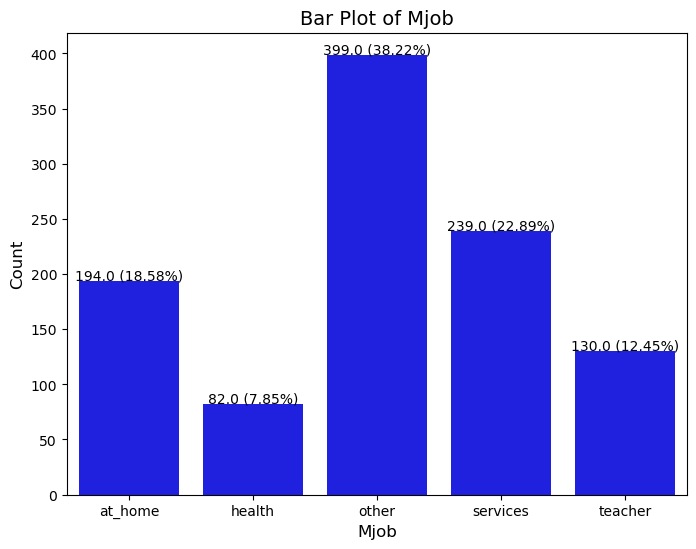

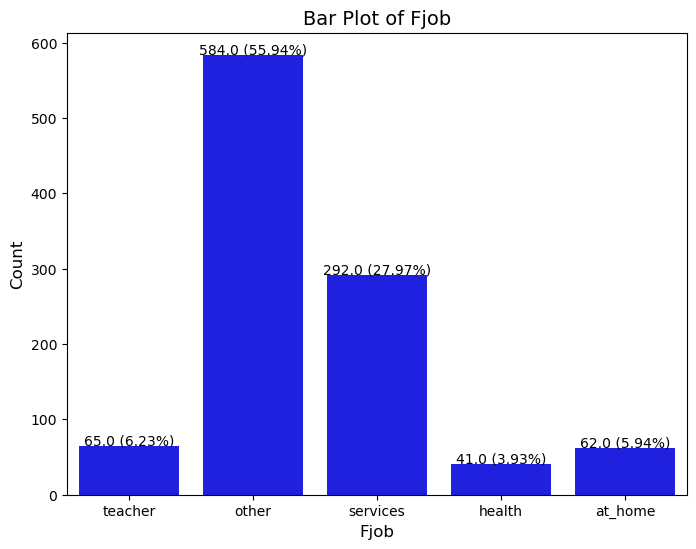

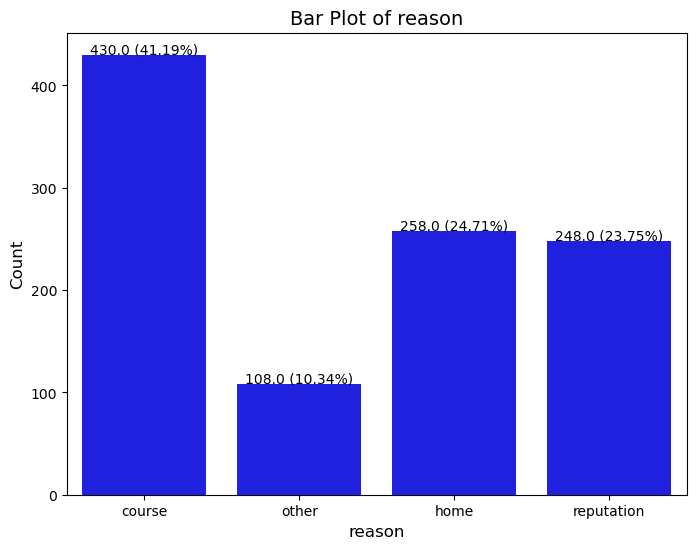

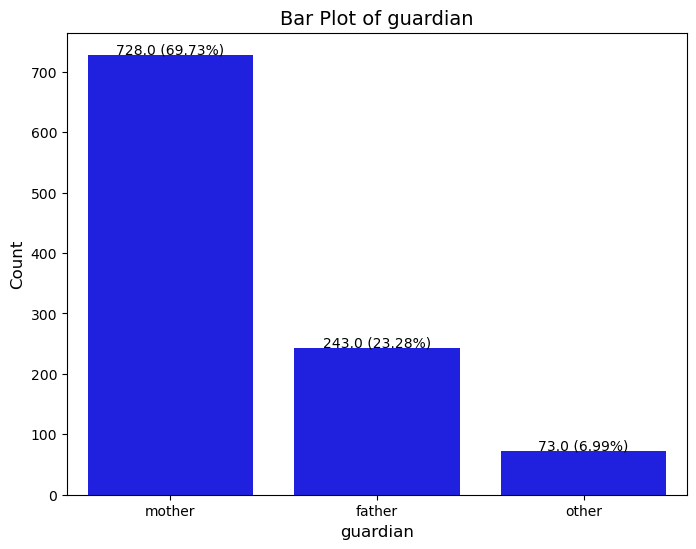

In [37]:
nom = ["Mjob", "Fjob", "reason", "guardian"]
for c in nom:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=df[c], color="b")
    plt.xlabel(c, size=12)
    plt.ylabel("Count", size=12)
    plt.title(f"Bar Plot of {c}", size=14)
    total = float(len(df[c]))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2,
                height + 1,
                f'{height} ({height/total:.2%})',
                ha="center")
    plt.show()

- Mother's and father's work prevails "other"

- 42% of students chose the school because of the course of study, others because it was close to home (25%), because of the school's reputation(24%), and a minority for other reasons (8%)

- Most students(70%) are followed by their mother, 24% by their father, and 6% other

******************************

# STEP 4: STUDENTS GRADES AND ALCOHOL 

Having obtained a comprehensive understanding of the dataset, our next step is to investigate whether alcohol consumption has an impact on students' grades.

Text(0.5, 0, 'Weekly alcohol consumption')

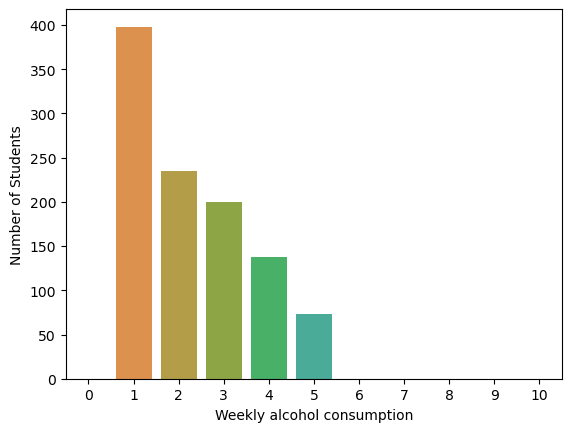

In [38]:
list = []
for i in range(11):
    list.append(len(df[df.Walc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

- There is no student who does not consume alcohol. However, all students at least 1 times in a week consume alcohol.

Text(0.5, 1.0, 'Dalc')

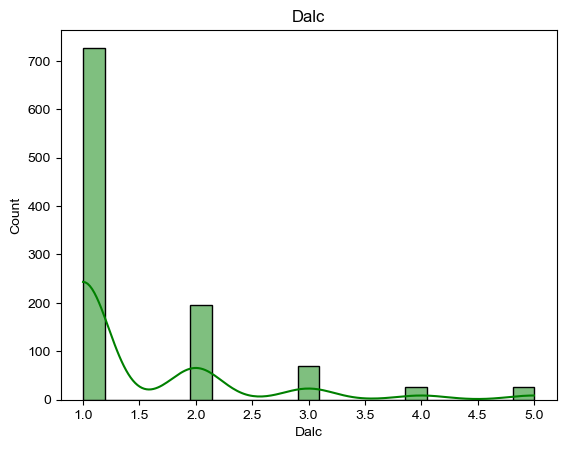

In [39]:
# here is the breakdown of dalc (daily alcohol consumption) across the student population
sns.histplot(df['Dalc'], color = 'Green', kde = True)
sns.set(rc={'figure.figsize':(19.7,8.27)})
plt.title('Dalc')

- In daily alcohol consuption, the majority of students consume very low alcohol.

Text(0.5, 1.0, 'Walc')

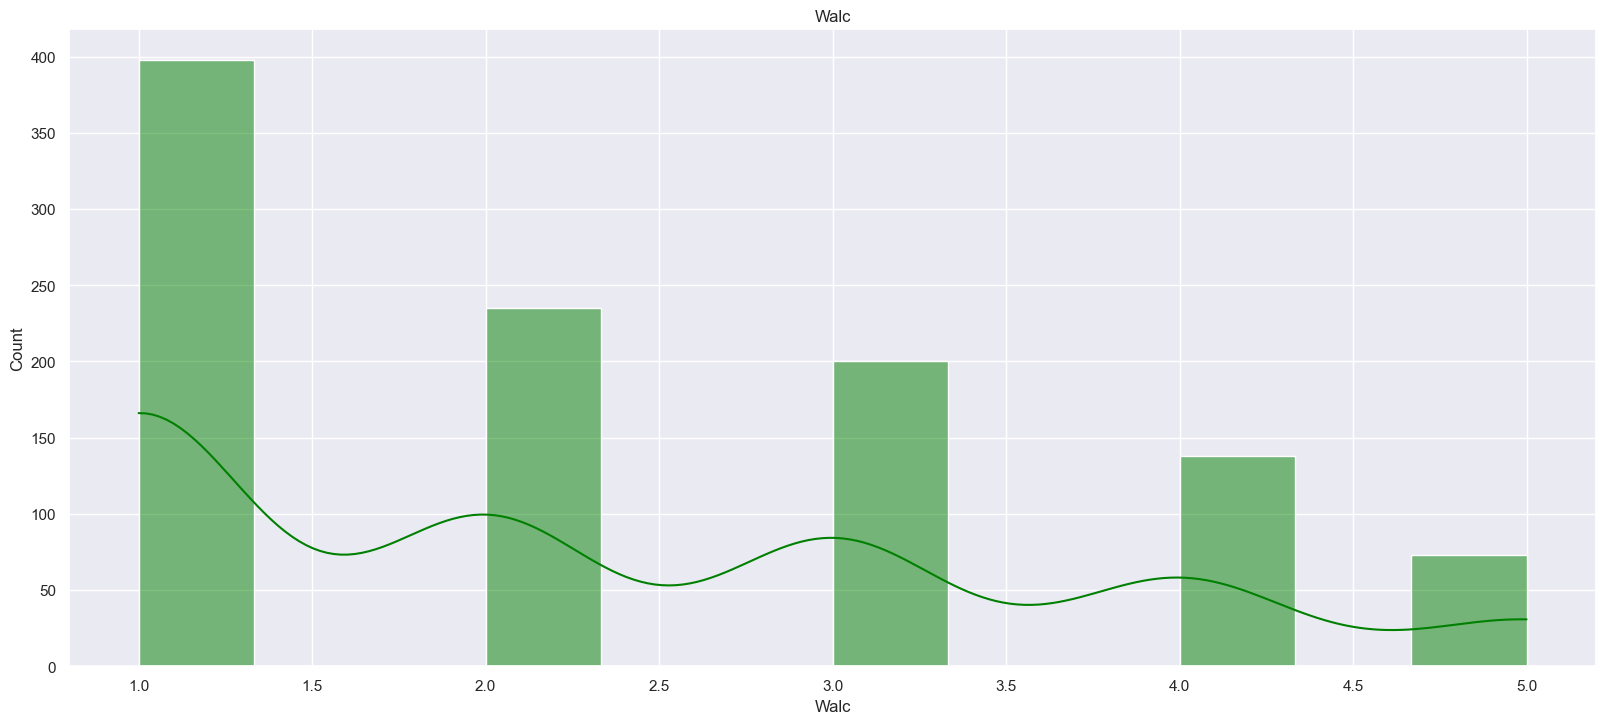

In [40]:
# here is the breakdown of dalc (daily alcohol consumption) across the student population
sns.histplot(df['Walc'], color = 'Green', kde = True)
sns.set(rc={'figure.figsize':(18,8)})
plt.title('Walc')

- In weekly alcohol consuption, the majority of students consume very low alcohol.

GRADE_1

(Text(0.5, 0, 'Daily Alcohol Consumption'), Text(0, 0.5, 'G1 score / 20'))

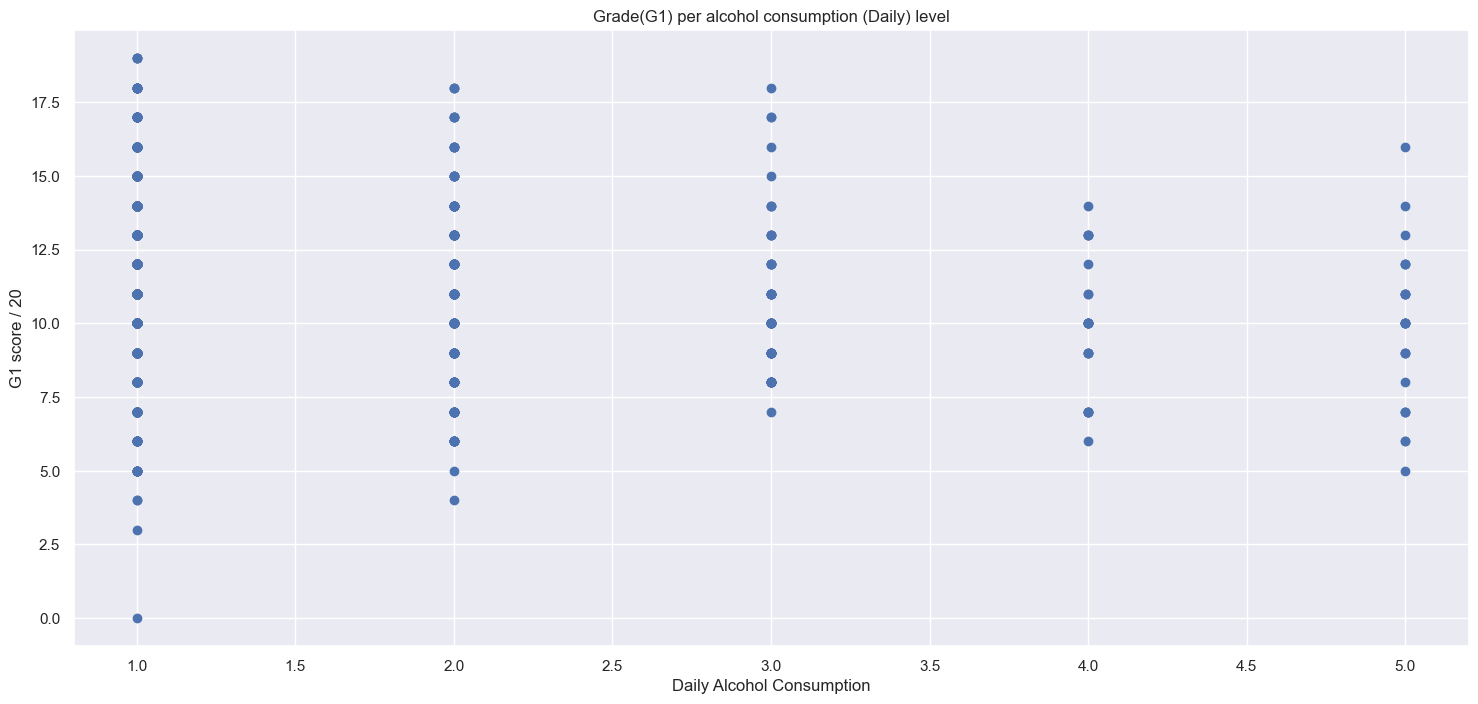

In [41]:
#Dalc -> daily alcohol consumption G1
plt.scatter(df['Dalc'],df['G1'])
plt.title('Grade(G1) per alcohol consumption (Daily) level')
plt.xlabel('Daily Alcohol Consumption'), plt.ylabel('G1 score / 20')

(Text(0.5, 0, 'Weekly Alcohol Consumption'), Text(0, 0.5, 'G1 score / 20'))

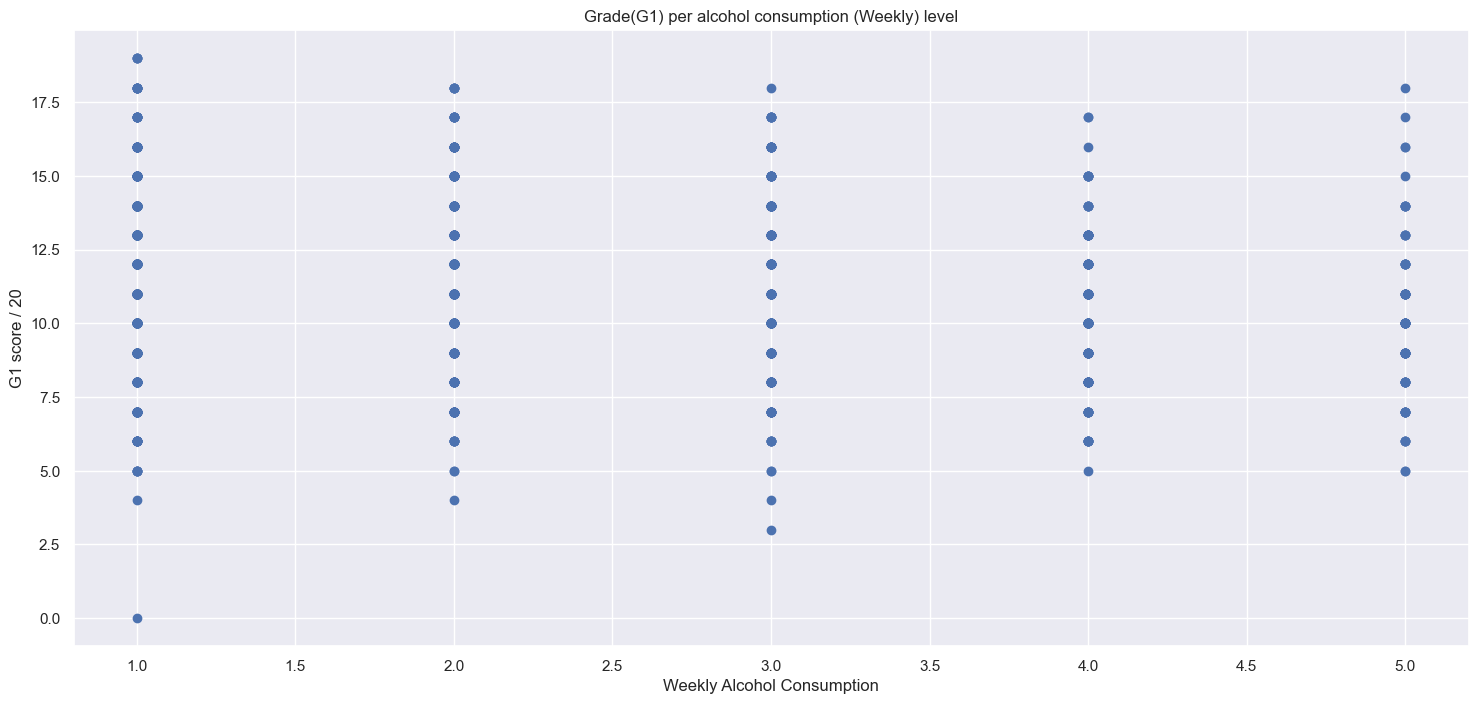

In [42]:
#Walc -> weekly alcohol consumption G1
plt.scatter(df['Walc'],df['G1'])
plt.title('Grade(G1) per alcohol consumption (Weekly) level')
plt.xlabel('Weekly Alcohol Consumption'), plt.ylabel('G1 score / 20')

GRADE_2

(Text(0.5, 0, 'Daily Alcohol Consumption'), Text(0, 0.5, 'G2 score / 20'))

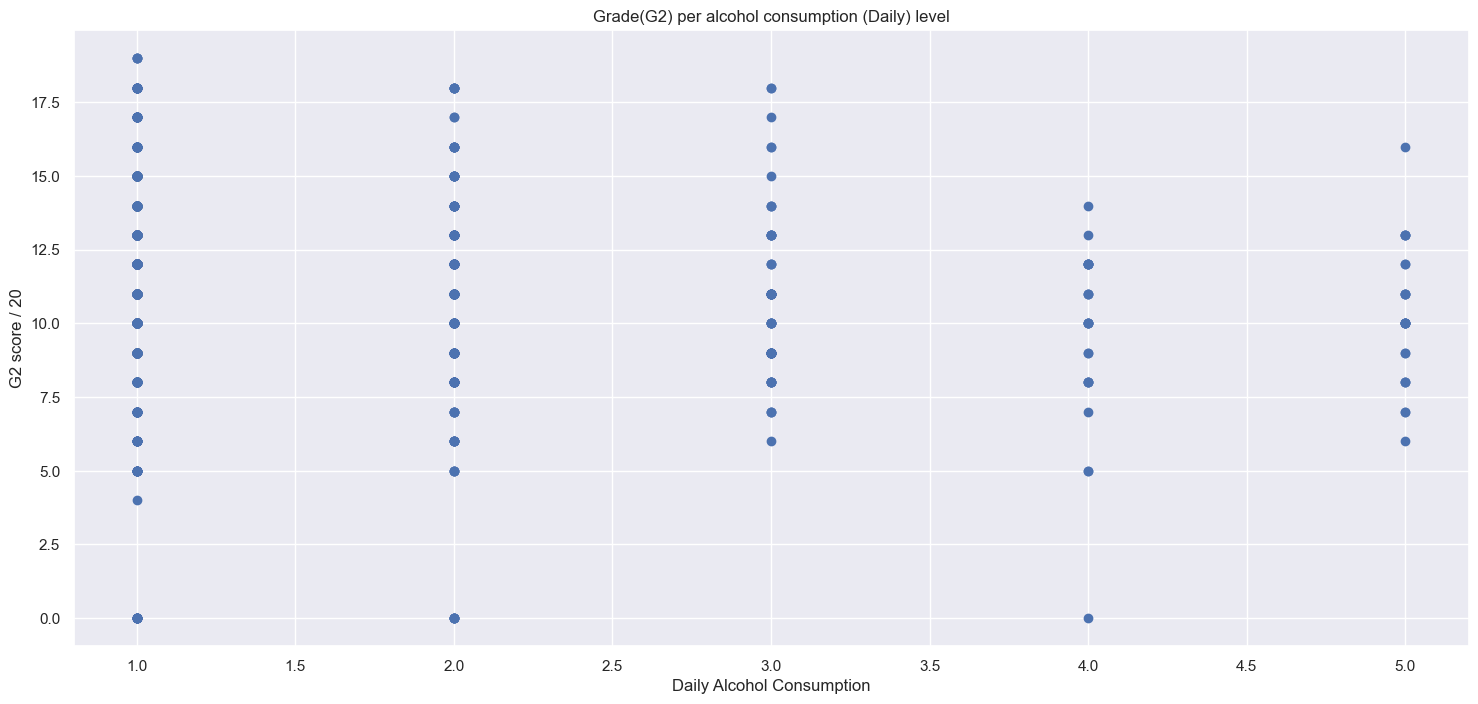

In [43]:
#Dalc -> daily alcohol consumption G2
plt.scatter(df['Dalc'],df['G2'])
plt.title('Grade(G2) per alcohol consumption (Daily) level')
plt.xlabel('Daily Alcohol Consumption'), plt.ylabel('G2 score / 20')

(Text(0.5, 0, 'Weekly Alcohol Consumption'), Text(0, 0.5, 'G2 score / 20'))

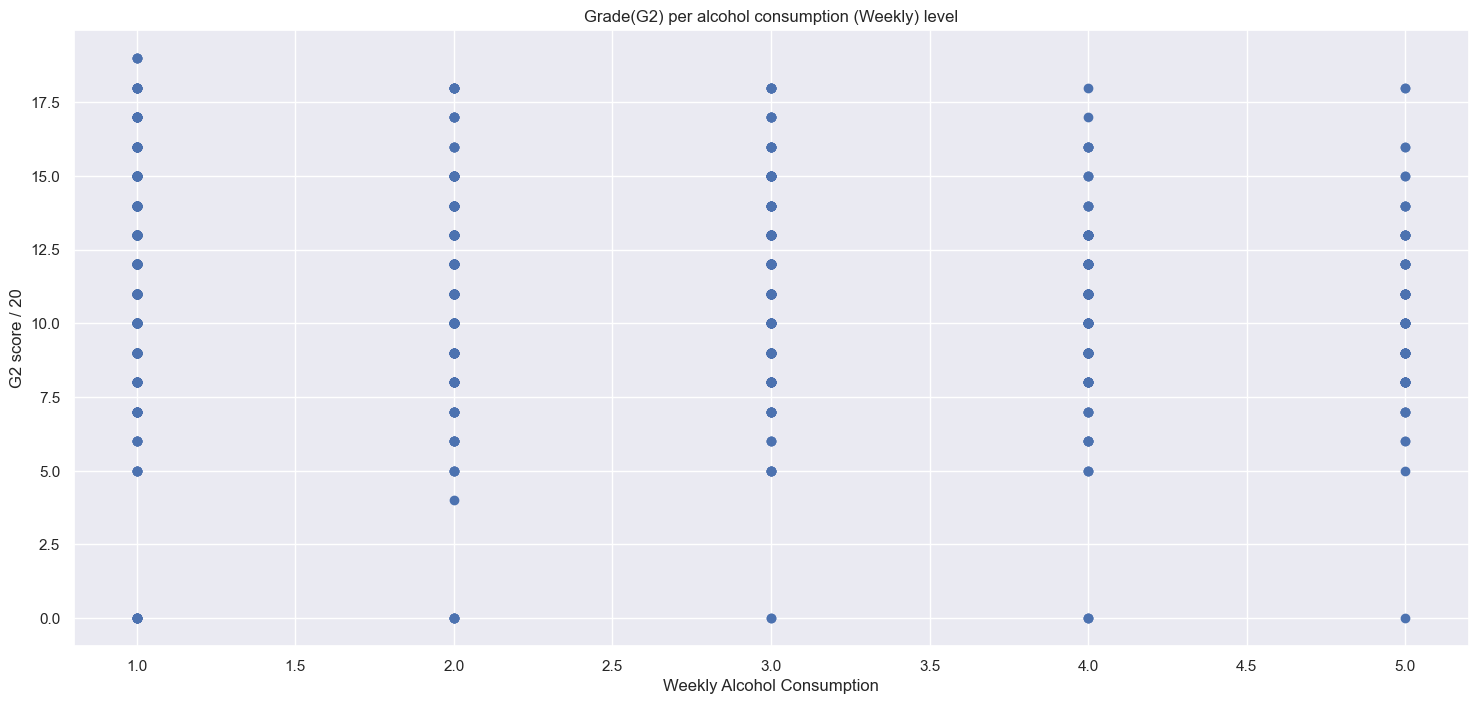

In [44]:
#Walc -> daily alcohol consumption G2
plt.scatter(df['Walc'],df['G2'])
plt.title('Grade(G2) per alcohol consumption (Weekly) level')
plt.xlabel('Weekly Alcohol Consumption'), plt.ylabel('G2 score / 20')

GRADE_3

(Text(0.5, 0, 'Daily Alcohol Consumption'), Text(0, 0.5, 'G3 score / 20'))

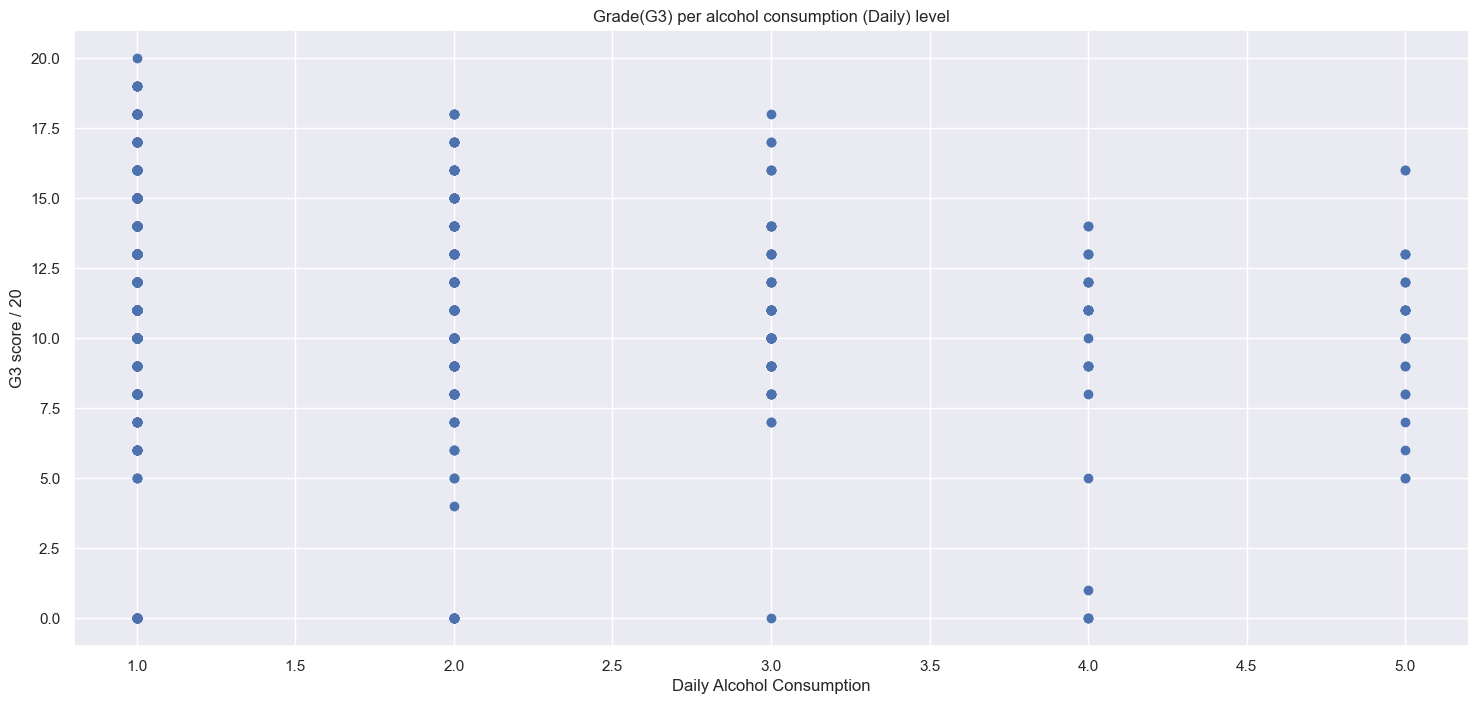

In [45]:
#Dalc -> daily alcohol consumption G3
plt.scatter(df['Dalc'],df['G3'])
plt.title('Grade(G3) per alcohol consumption (Daily) level')
plt.xlabel('Daily Alcohol Consumption'), plt.ylabel('G3 score / 20')

(Text(0.5, 0, 'Weekly Alcohol Consumption'), Text(0, 0.5, 'G3 score / 20'))

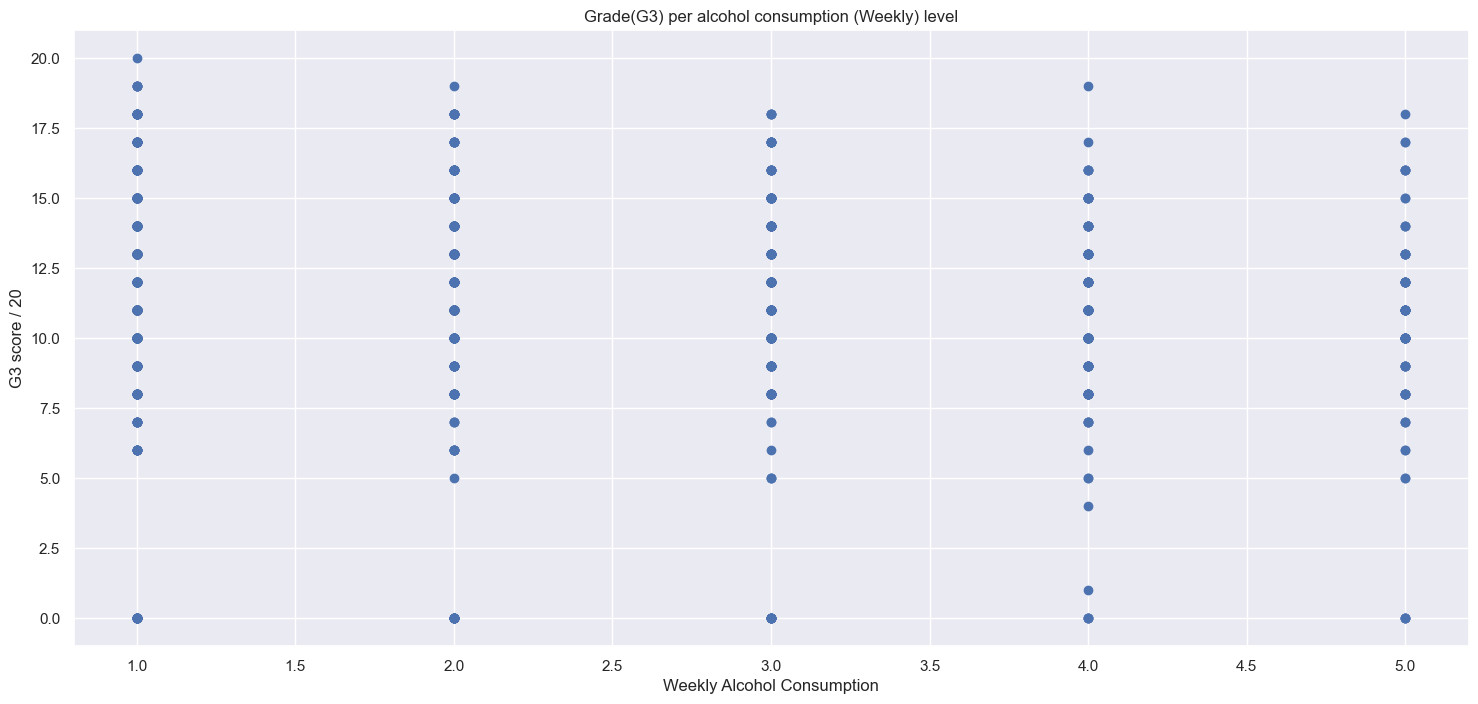

In [46]:
#Walc -> weekly alcohol consumption G3
plt.scatter(df['Walc'],df['G3'])
plt.title('Grade(G3) per alcohol consumption (Weekly) level')
plt.xlabel('Weekly Alcohol Consumption'), plt.ylabel('G3 score / 20')

In [10]:
#average test scores per three periods of exams
df['test_avg'] = (df['G1'] + df['G2'] + df['G3']) / 3
high_alc = df[df['Dalc'] >= 3]
low_alc = df[df['Dalc'] <= 2]

#erasing 0s
high_alc = high_alc[high_alc.G1 != 0]
high_alc = high_alc[high_alc.G2 != 0]
high_alc = high_alc[high_alc.G3 != 0]

low_alc = low_alc[low_alc.G1 != 0]
low_alc = low_alc[low_alc.G2 != 0]
low_alc = low_alc[low_alc.G3 != 0]

print("high_alc student scores: " + str(high_alc['test_avg'].mean()))
print("NOT high_alc student scores: " + str(low_alc['test_avg'].mean()))

high_alc student scores: 10.55840455840456
NOT high_alc student scores: 11.811760213822069


- As we can see students labeled as low_alc(Dalc<=2) had almost have a 5% higher test average over three exams!

In [11]:
#does being a romantic partner make you a better/worse student
print('the sum of the romantic values:')
df['romantic'].value_counts()

the sum of the romantic values:


no     673
yes    371
Name: romantic, dtype: int64

In [12]:
yes = df[df['romantic'] == 'yes']['test_avg'].mean()
no = df[df['romantic'] == 'no']['test_avg'].mean()
print("Having a Romantic relationship averages: "+ str(yes))
print("Having a Normal relathionship averages: " + str(no))

Having a Romantic relationship averages: 10.87780772686433
Having a Normal relathionship averages: 11.481921743437345


- As we can see students who are not romantic tend to have 5,5% higher test over three exams.

- Based on the analysis of G1, G2, and G3 scores, along with romantic relationships, it can be deduced that students who consume lower levels of alcohol on a daily and weekly basis tend to have higher grades

# STEP 4.1: STUDENTS PARENTS STATUS AND ALCOHOL

Having established that alcohol consumption affects students' grades, our next step is to examine whether students from separated parents consume more alcohol.

Text(0, 0.5, '1=Min / 5 = Max')

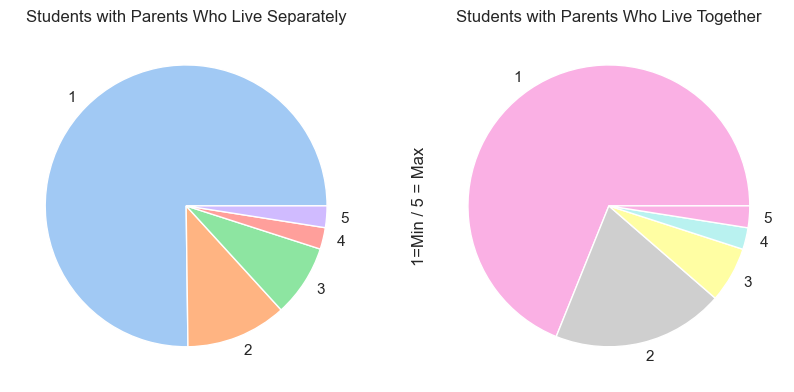

In [50]:
#feature engineering and viz for pstatus x dalc
sep = df[df['Pstatus'] == 'A']
tog = df[df['Pstatus'] == 'T']
sep_count = sep['Dalc'].value_counts(normalize = True)
tog_count = tog['Dalc'].value_counts(normalize = True)
#insert pie chart of these two here to show proportions

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to your two pies

colors = sns.color_palette('pastel')[0:5]
colors2 = sns.color_palette('pastel')[6:11]

ax1.pie(sep_count, labels = sep_count.index, colors = colors)
ax1.set_title('Students with Parents Who Live Separately')
ax2.pie(tog_count, labels = sep_count.index, colors = colors2)
ax2.set_title('Students with Parents Who Live Together')
plt.ylabel('1=Min / 5 = Max')

In [51]:
#mean alconsumption of those with separated parents
parents_alc = df[df['Pstatus'] == 'A']
p_a = parents_alc['Dalc'].mean()
p_b = df['Dalc'].mean()
print("Separated parents dalc vals " + str(round(p_a, 3)) 
      + " versus those with nonseparated parents " + str(round(p_b,3)))

Separated parents dalc vals 1.455 versus those with nonseparated parents 1.494


- This is an interesting comparison. Those who have separated parents seem to drink more alcohol than those who don't.

In [52]:
#check which values are more corralated with the test results:
df['test_avg'] = (df['G1'] + df['G2'] + df['G3']) / 3

corrmatrix = df.corr()

corrmatrix['test_avg'].sort_values()

C:\Program Files\KMSpico\temp\ipykernel_7840\969790701.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



failures     -0.397262
Dalc         -0.143283
Walc         -0.133902
age          -0.129135
traveltime   -0.126157
goout        -0.107309
health       -0.080672
absences     -0.077224
freetime     -0.065489
famrel        0.047518
Fedu          0.186610
studytime     0.192288
Medu          0.226919
G1            0.924937
G3            0.960050
G2            0.970015
test_avg      1.000000
Name: test_avg, dtype: float64

- As we can see from the correlation maxtrix the next predictors after the Grades are the mother education,the father education and the studytime.The mother education is more correlated with test scores than studytime itself.

Does it influence whether the guardian is the mother or the father in the consumption of alcohol?

c:\Users\User\anaconda31\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\User\anaconda31\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\User\anaconda31\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\User\anaconda31\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\User\anaconda31\lib\site-packages\seaborn\categorical.py:3544: UserWarning:

36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\User\anaconda31\lib\site-packag

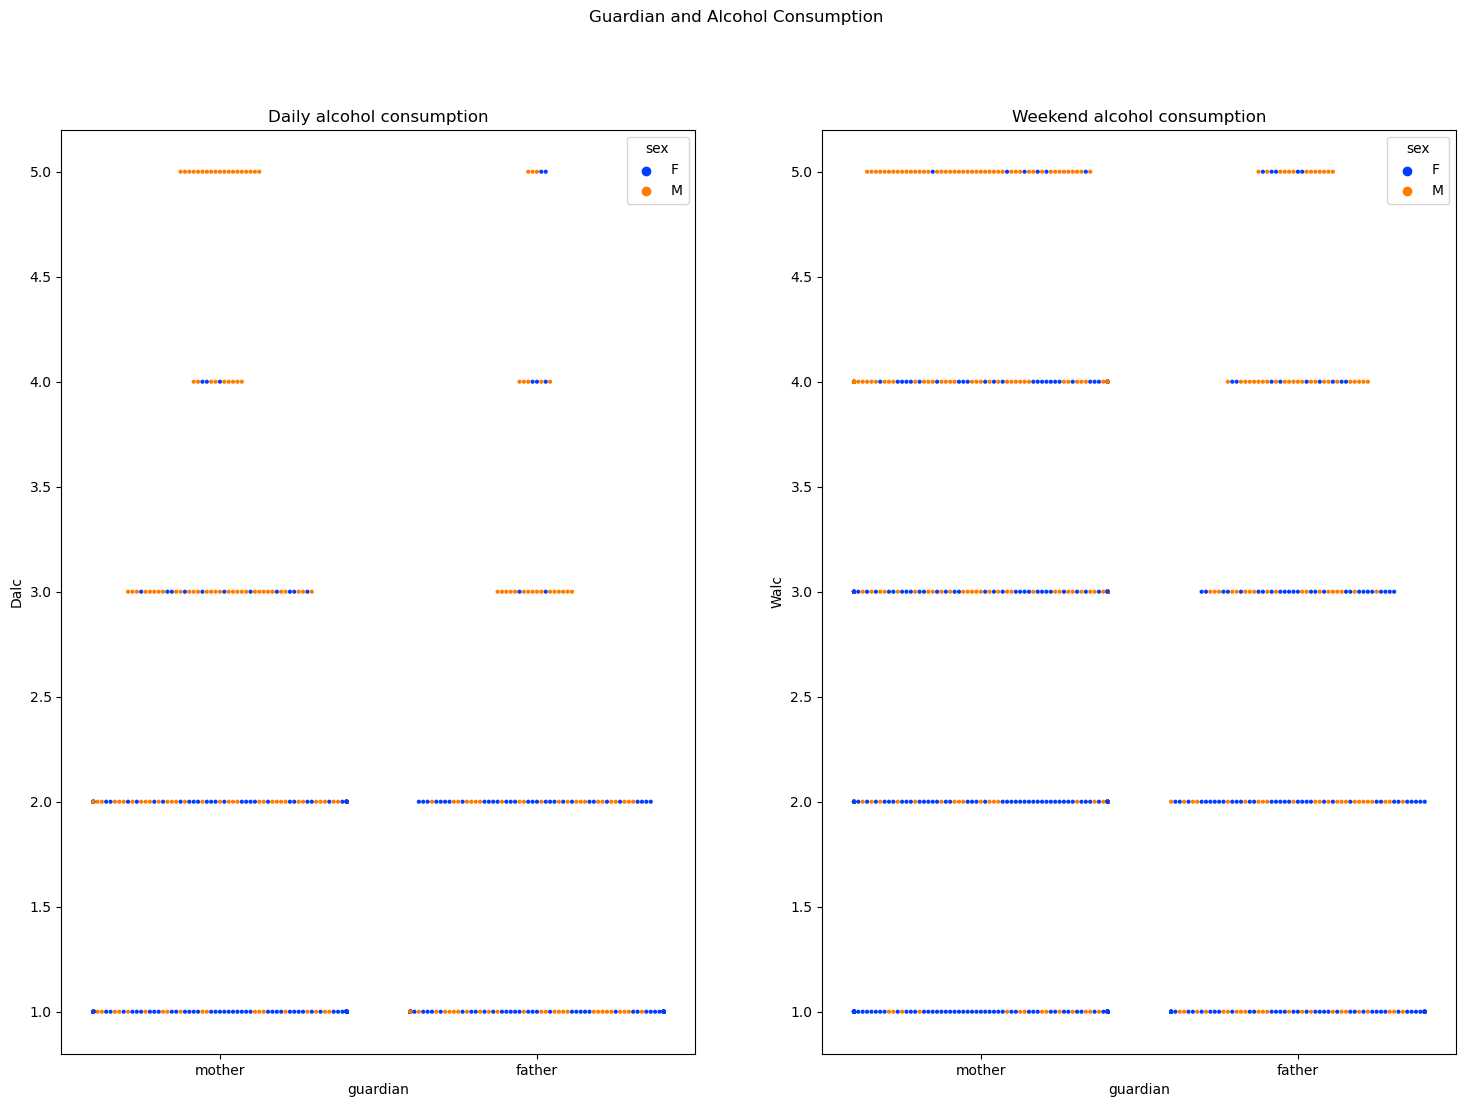

In [20]:
# Filter the dataframe to only include rows where the guardian is either "father" or "mother"
filtered = df.loc[(df['guardian'] == 'father') | (df['guardian'] == 'mother')]

# Create a figure with two subplots
f, axes = plt.subplots(1, 2, figsize= (18,12))

# Add a title to the plot
plt.suptitle('Guardian and Alcohol Consumption')

# Create a swarm plot of daily alcohol consumption by guardian and sex
sns.swarmplot(ax=axes[0], x="guardian", y="Dalc", hue="sex", data=filtered, palette='bright', size=3)
axes[0].set_title('Daily alcohol consumption')

# Create a swarm plot of weekend alcohol consumption by guardian and sex
sns.swarmplot(ax=axes[1], x="guardian", y="Walc", hue="sex", data=filtered, palette='bright', size=3)
axes[1].set_title('Weekend alcohol consumption')

# Display the plot
plt.show()

- The swarmplot graph shows that both daily and weekend alcohol consumption is higher in those students whose tutor is the mother.

# STEP 4.2: OTHER INTERESTINGS STUDENTS  AND ALCOHOL CORELATIONS

Now that we have determined that students from separated parents tend to consume more alcohol, our next step is to investigate any further correlations between students and alcohol.

1) Students that live in a rural address drink less than those who live in an urban address?

C:\Program Files\KMSpico\temp\ipykernel_4424\3617932016.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



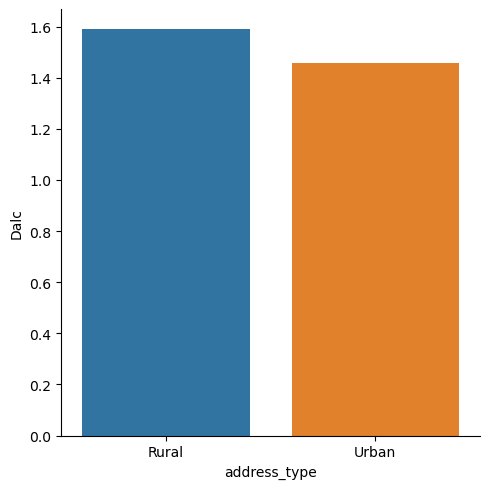

In [32]:
df['address_type'] = df['address'].apply(lambda x: 'Rural' if x == 'R' else 'Urban')
grouped_df = df.groupby('address_type')['Dalc', 'Walc'].mean().reset_index()
sns.catplot(data=grouped_df, x='address_type', y='Dalc', kind='bar')


- Taking into account the catplot graph, it is evident that alcohol consumption is higher in those who live in urban areas. The explanations for this conclusion can be based on the fact that in urban areas there are more places to go to buy alcohol since, simply, there is a greater proportion of students who live in these areas and therefore they can meet more easily to consume alcohol . In addition, journeys can be made more easily thanks to public transport.

2) Does students drink more when they are younger or older?

In [58]:
df.groupby(['age'])['Dalc'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15,194.0,1.371134,0.731520,1.0,1.0,1.0,2.0,5.0
16,281.0,1.409253,0.827941,1.0,1.0,1.0,2.0,5.0
17,277.0,1.541516,0.937876,1.0,1.0,1.0,2.0,5.0
18,222.0,1.558559,0.994871,1.0,1.0,1.0,2.0,5.0
19,56.0,1.642857,0.998700,1.0,1.0,1.0,2.0,4.0
20,9.0,1.555556,1.013794,1.0,1.0,1.0,2.0,4.0
21,3.0,3.000000,2.000000,1.0,2.0,3.0,4.0,5.0
22,2.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0


- We notice that alcohol consumption decreases with age.

3) Do Female students drink more than male students?

C:\Program Files\KMSpico\temp\ipykernel_4424\1720137606.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



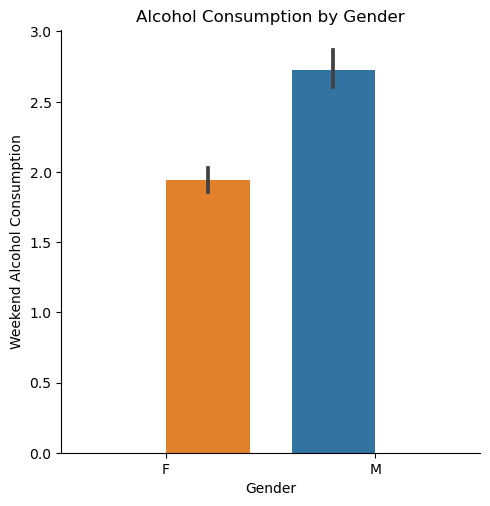

In [38]:
df['gender'] = df['sex'].apply(lambda x: 1 if x == 'F' else 0)
grouped_df = df.groupby('gender')['Dalc', 'Walc'].mean().reset_index()
#sns.catplot(data=grouped_df, x='gender', y='Dalc', kind='bar')
sns.catplot(x='sex', y='Walc', data=df, kind='bar', hue='sex', hue_order=['M', 'F'])
plt.title('Alcohol Consumption by Gender')
plt.xlabel('Gender')
plt.ylabel('Weekend Alcohol Consumption')
plt.show()


C:\Program Files\KMSpico\temp\ipykernel_4424\2098550814.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



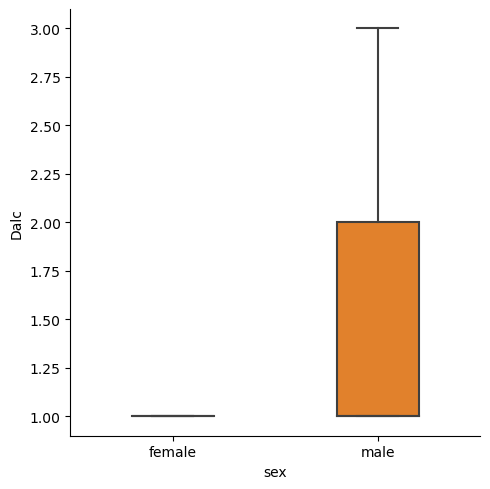

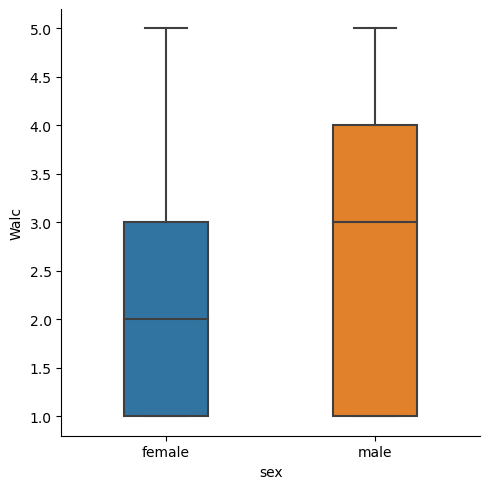

In [54]:
# create a dataframe with relevant columns
alc_data = df[['sex', 'Dalc', 'Walc']]

# convert sex column values to 'male' and 'female'
alc_data['sex'] = alc_data['sex'].map({'M': 'male', 'F': 'female'})

# create separate catplots for Dalc and Walc
sns.catplot(x="sex", y="Dalc", data=alc_data, kind="box", showfliers=False, width=0.4)
sns.catplot(x="sex", y="Walc", data=alc_data, kind="box", showfliers=False, width=0.4)

# display the plots
plt.show()

- We can observe that, both in daily consumption and in weekend consumption, the frequency with which the students consume more alcohol is greater in men than in women. This may be due to the fact that the basal ganglia of men generate a greater amount of Dopamine than those of women and, consequently, a greater search for this pleasant effect.

********************************

# STEP 5: MODEL 

Linear Regressions:

In [59]:
df['test_avg'] = (df['G1'] + df['G2'] + df['G3']) / 3

# Extract the predictor variables Medu and Studytime
X = df[['Medu', 'studytime']]

# Extract the target variable
y = df['test_avg']

# Create a linear regression object
lr = LinearRegression()

# Fit the model using the predictor and target variables
lr.fit(X, y)

# Print the intercept and coefficients
print('Intercept:', lr.intercept_)
print('Coefficients:', lr.coef_)

Intercept: 8.37757638449511
Coefficients: [0.60441026 0.66797431]


* The first model that we fitted with 'Medu' and 'studytime' as predictor variables has a higher R-squared value 
than the other models, but the value is still relatively low at 0.0515. 

The coefficients suggest that both Medu and studytime have a positive relationship with test_avg, with studytime(0.66) having a slightly stronger effect than Medu(0.60). 

In [60]:
model = LinearRegression()
x = np.array(df['Dalc']).reshape((-1, 1))
y = df['G1']
model.fit(x,y)
r2 = model.score(x,y)
print("Coeff of determination: " + str(round(r2,4)))

Coeff of determination: 0.0228


In [61]:
model = LinearRegression()
x = np.array(df['Dalc']).reshape((-1, 1))
y = df['G2']
model.fit(x,y)
r2 = model.score(x,y)
print("Coeff of determination: " + str(round(r2,4)))

Coeff of determination: 0.0173


In [62]:
model = LinearRegression()
x = np.array(df['Dalc']).reshape((-1, 1))
y = df['G3']
model.fit(x,y)
r2 = model.score(x,y)
print("Coeff of determination: " + str(round(r2,4)))

Coeff of determination: 0.0168


As we can see from our rough linear regression, the Dalc variable has a very weak effect on students G1/G2/G3 Math exam scores.

In [63]:
model = LinearRegression()
x = np.array(df['Walc']).reshape((-1, 1))
y = df['G1']
model.fit(x,y)
r2 = model.score(x,y)
print("Coeff of determination: " + str(round(r2,4)))

Coeff of determination: 0.0203


In [64]:
model = LinearRegression()
x = np.array(df['Walc']).reshape((-1, 1))
y = df['G2']
model.fit(x,y)
r2 = model.score(x,y)
print("Coeff of determination: " + str(round(r2,4)))

Coeff of determination: 0.0164


In [65]:
model = LinearRegression()
x = np.array(df['Walc']).reshape((-1, 1))
y = df['G3']
model.fit(x,y)
r2 = model.score(x,y)
print("Coeff of determination: " + str(round(r2,4)))

Coeff of determination: 0.0134


* Additionally, the models we fitted with 'Dalc' and 'Walc' as predictor variables and 'G1', 'G2', and 'G3' as target 
variables all have very low R-squared values. This suggests that there is no linear relationship between the amount 
of alcohol consumed by the students and their academic performance.

Also the Walc variable has even a more weak effect on students G1/G2/G3 Math exam scores.

In [66]:
model = LinearRegression()
x = np.array(df['Medu']).reshape((-1, 1))
y = df['test_avg']
model.fit(x,y)
r2 = model.score(x,y)
print("Coeff of determination: " + str(round(r2,4)))

Coeff of determination: 0.0515


In [67]:
model = LinearRegression()
x = np.array(df['studytime']).reshape((-1, 1))
y = df['test_avg']
model.fit(x,y)
r2 = model.score(x,y)
print("Coeff of determination: " + str(round(r2,4)))

Coeff of determination: 0.037


In [68]:
model = LinearRegression()
x = np.array(df['Fedu']).reshape((-1, 1))
y = df['test_avg']
model.fit(x,y)
r2 = model.score(x,y)
print("Coeff of determination: " + str(round(r2,4)))

Coeff of determination: 0.0348


As we can see from our linear regressions, The education of the mother is a better predictor than studytime itself.Also the education of the father is almost very close to the studytime.

We will create a model that uses a student's first two scores (G1 and G2), along with other metrics to predict their G3 scores.

In [69]:
#students with zeros on G3 exam
len(df[df['G3'] == 0])

53

There are 53 students that got 0 on the G3 exam, most likely Not Shown.

In [70]:
#REMOVING ALL STUDENTS WHO GOT A O on FINAL EXAM
df = df[df['G3'] != 0]
X = df[['G1', 'G2', 'Fedu', 'Medu', 'studytime']]
y = df['G3']




* We removed all students who received a 0 on the final exam,as these students were likely absent and their grades could skew the results of the model.

In [71]:
model_main = SVR(kernel='linear', C=1, epsilon=0.1)

* We split the data into training and testing sets and fit the model to the training data using a linear kernel 
with a C value of 1 and an epsilon value of 0.1. 

In [73]:
#SUPPORT VECTOR REGRESSION
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
model_main = model_main.fit(X_train, y_train)
y_pred = model_main.predict(X_test).reshape(-1,1)
model_main.score(X_test, y_test)

0.8905832432670473

* We use the model to make predictions on the test data and evaluated the accuracy of the model using the score method.

This means that the model is able to explain 89% of the variance in the target variable (G3) using the predictor variables (G1 and G2).

* We also plotted the predicted vs actual values of the test data to visualize the performance of the model. 

Text(0, 0.5, 'Testing')

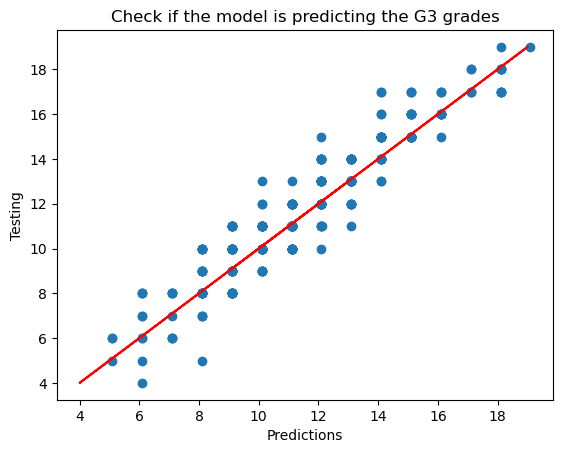

In [74]:
plt.scatter(y_pred, y_test)
plt.plot(y_test, y_test, color = 'red')
plt.title('Check if the model is predicting the G3 grades')
plt.xlabel('Predictions')
plt.ylabel('Testing')

* It looks like the model is performing fairly well, with a relatively tight clustering of predicted vs actual values around the diagonal line, indicating good predictive performance.

In [75]:
score = r2_score(y_pred, y_test)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 88.0%


* We then calculated the Mean Absolute Error (MAE) and Mean Squared Error (MSE) of the model, which are both measures of the model's prediction error.

This means that the model is able to explain 88% of the variance in the target variable (G3) using the predictor variables (G1 and G2).

In [76]:
score = mean_absolute_error(y_pred, y_test)
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 0.71


The mean absolute error (MAE) represents the average absolute difference between the actual and predicted values of the target variable. A lower MAE indicates that the model is better at predicting the target variable. In your case, an MAE of 0.71 suggests that, on average, the model is off by 0.71 units when predicting the test_avg variable.

* Lastly, we tested the model's ability to make predictions on three  student's by selecting a random row from the test data and comparing the model's predicted value to the actual value.

In [77]:
score = np.sqrt(mean_squared_error(y_pred, y_test))
print("The Mean Squared Error of our Model is {}".format(round(score, 2)))

The Mean Squared Error of our Model is 0.97


The mean squared error (MSE) represents the average of the squared differences between the actual and predicted values of the target variable. Like the MAE, a lower MSE indicates that the model is better at predicting the target variable. In your case, an MSE of 0.97 suggests that, on average, the model's predictions are off by 0.97 units squared when predicting the test_avg variable.

************************************

* We will now use the model we trained to do some completely random predictions by using the np.random-->randit.


In [81]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

In [82]:
X = np.array(X_test.iloc[10]).reshape(1,-1)
pred = model_main.predict(X)
actual = y_test.iloc[10]
print("The student's predicted score was " + str(pred[0]))
print("but his actual score was " + str(actual))

The student's predicted score was 13.099790528372257
but his actual score was 12


* The model gets using our test data as if a random person were to input their data.

In [83]:
N = np.random.randint(0, len(X_test))
X = np.array(X_test.iloc[N]).reshape(1,-1)
pred = model_main.predict(X)
actual = y_test.iloc[N]
print("The student's predicted score was " + str(round(pred[0])))
print("but his actual score was " + str(round(actual)))

The student's predicted score was 9
but his actual score was 8


In [84]:
#completely random predictions
N = np.random.randint(0, len(X_test))
X = np.array(X_test.iloc[N]).reshape(1,-1)
pred = model_main.predict(X)
actual = y_test.iloc[N]
print("The student's predicted score was " + str(round(pred[0])))
print("but his actual score was " + str(round(actual)))

The student's predicted score was 13
but his actual score was 13


* It's obvious from the outcome that the model is performing pretty well, by predicting the exact score or very close of the actual score of the student.

* # For reaching an overall conclusion about the model:
  # The model is able to explain 89% of the variance in the target variable (G3) using the predictor variables (G1 and G2). This indicates that there is  a strong relationship between the predictor variables and the target variable, the model is performing well in terms of explaining the variation in the target variable.
  # Testing the model on three random students and comparing the predicted values to the actual values, indicates thatthe model was pretty accurate, this suggests that the model is able to make accurate predictions on new data.

**********************

In [10]:
# Perform Shapiro-Wilk test
stat, p = shapiro(df['G1'])

# Print test statistics
print('Shapiro-Wilk test statistics for G1 :\n')
print('Statistic=%.3f, p-value=%.3f' % (stat, p))


# Determine whether the distribution is normal or not
alpha = 0.05
if p > alpha:
    print('The distribution of G1 is likely normal (fail to reject H0)')
else:
    print('The distribution of G1 is likely not normal (reject H0)')

Shapiro-Wilk test statistics for G1 :

Statistic=0.986, p-value=0.000
The distribution of G1 is likely not normal (reject H0)


In [11]:
# Perform Shapiro-Wilk test
stat, p = shapiro(df['G2'])

# Print test statistics
print('Shapiro-Wilk test statistics for G2 :\n')
print('Statistic=%.3f, p-value=%.3f' % (stat, p))


# Determine whether the distribution is normal or not
alpha = 0.05
if p > alpha:
    print('The distribution of G2 is likely normal (fail to reject H0)')
else:
    print('The distribution of G2 is likely not normal (reject H0)')

Shapiro-Wilk test statistics for G2 :

Statistic=0.964, p-value=0.000
The distribution of G2 is likely not normal (reject H0)


In [12]:
# Perform Shapiro-Wilk test
stat, p = shapiro(df['G3'])

# Print test statistics
print('Shapiro-Wilk test statistics for G3 :\n')
print('Statistic=%.3f, p-value=%.3f' % (stat, p))


# Determine whether the distribution is normal or not
alpha = 0.05
if p > alpha:
    print('The distribution of G3 is likely normal (fail to reject H0)')
else:
    print('The distribution of G3 is likely not normal (reject H0)')

Shapiro-Wilk test statistics for G3 :

Statistic=0.918, p-value=0.000
The distribution of G3 is likely not normal (reject H0)


* The Shapiro-Wilk tests indicate that the distributions of G1, G2, and G3 are likely not normal (p-values less than 0.05), which means that they are not normally distributed.

In [16]:
from scipy.stats import ttest_ind, f_oneway
# Perform t-tests for G1, G2, and G3
g1 = df[df['school'] == 'GP']['G1']
g2 = df[df['school'] == 'GP']['G2']
g3 = df[df['school'] == 'GP']['G3']

t1, p1 = ttest_ind(g1, g2)
t2, p2 = ttest_ind(g1, g3)
t3, p3 = ttest_ind(g2, g3)

print('T-tests for G1, G2, and G3:')
print('G1 vs G2: t = %.2f, p = %.2f' % (t1, p1))
print('G1 vs G3: t = %.2f, p = %.2f' % (t2, p2))
print('G2 vs G3: t = %.2f, p = %.2f' % (t3, p3))

# Perform ANOVA test for G1, G2, and G3
f, p = f_oneway(g1, g2, g3)

print('ANOVA test for G1, G2, and G3:')
print('F = %.2f, p = %.2f' % (f, p))

T-tests for G1, G2, and G3:
G1 vs G2: t = -0.10, p = 0.92
G1 vs G3: t = -0.70, p = 0.48
G2 vs G3: t = -0.59, p = 0.56
ANOVA test for G1, G2, and G3:
F = 0.30, p = 0.74


* The t-tests results show that there is no statistically significant difference between the means of G1 and G2, G1 and G3, and G2 and G3 (p-values are all greater than 0.05). This means that the average scores of the three exams are not significantly different from each other.

* The ANOVA test result shows that there is no significant difference in the means of the three exams (p-value=0.74). This suggests that the average scores of the three exams are not significantly different from each other, supporting the findings of the t-tests.

* Overall, the results of the hypothesis tests suggest that there is no significant difference between the means of the three exams, despite the distributions of G1, G2, and G3 being non-normal. This could be due to the fact that the sample sizes are relatively large, which can lead to the central limit theorem applying and the distribution becoming approximately normal.